#### American Express and Analytics Vidhya presents “AmExpert 2019 – Machine Learning Hackathon”.

To predict: Whether or not a customer will reedem a coupon on next transaction, based on previous transactions

##### Train accuracy: 0.9643835616438357
##### Test accuracy: 0.8232017780

In [1]:
## Note: It is just the approach that I followed.To use code please change the file path

In [6]:
import pandas as pd

In [5]:
# !pip install matplotlib

In [185]:
df_train = pd.read_csv("train_v2.csv", error_bad_lines=False)

In [186]:
df_train.shape

(78369, 5)

In [187]:
df_train.isnull().sum()

id                   0
campaign_id          0
coupon_id            0
customer_id          0
redemption_status    0
dtype: int64

In [201]:
df_train[df_train["redemption_status"] == 1]

,id,campaign_id,coupon_id,customer_id,redemption_status
44,72,13,413,276,1
181,299,13,960,467,1
217,359,26,797,214,1
237,387,13,754,1103,1
607,998,13,21,1457,1
...,...,...,...,...,...
77617,127381,13,982,1408,1
77729,127565,13,885,781,1
77830,127701,13,726,407,1
78060,128076,9,705,999,1


In [189]:
df_customer_demographic = pd.read_csv("customer_demographics.csv")
df_campaign_data = pd.read_csv("campaign_data.csv")
df_coupon_item_mapping = pd.read_csv("coupon_item_mapping.csv")
df_customer_transaction_data = pd.read_csv("customer_transaction_data.csv")
df_item_data = pd.read_csv("item_data.csv")

In [190]:
## Data merging
## Train and campaign data

# df_campaign_data.shape

In [192]:
train_merged = pd.merge(df_train, df_campaign_data, left_on='campaign_id', right_on='campaign_id', how='left')

In [193]:
train_merged.shape

(78369, 8)

In [269]:
train_merged[(train_merged["customer_id"] == 1) & train_merged["redemption_status"] == 1]

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date
25380,41644,8,473,1,1,X,16/02/13,05/04/13
57575,94621,8,772,1,1,X,16/02/13,05/04/13


In [205]:
train_merged

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date
0,1,13,27,1053,0,X,19/05/13,05/07/13
1,2,13,116,48,0,X,19/05/13,05/07/13
2,6,9,635,205,0,Y,11/03/13,12/04/13
3,7,13,644,1050,0,X,19/05/13,05/07/13
4,9,8,1017,1489,0,X,16/02/13,05/04/13
...,...,...,...,...,...,...,...,...
78364,128587,8,71,1523,0,X,16/02/13,05/04/13
78365,128589,30,547,937,0,X,19/11/12,04/01/13
78366,128590,8,754,1004,0,X,16/02/13,05/04/13
78367,128592,13,134,71,0,X,19/05/13,05/07/13


In [220]:
df_customer_transaction_data

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0
...,...,...,...,...,...,...,...
1324561,2013-06-30,1129,2777,1,284.60,-71.24,0.0
1324562,2013-06-30,1129,2953,4,42.74,-28.50,0.0
1324563,2013-06-30,1129,2971,6,64.12,-42.74,0.0
1324564,2013-06-30,1129,46984,1,95.82,0.00,0.0


In [241]:
df_customer_transaction_data.shape

(1324566, 7)

In [213]:
# from datetime import timedelta

In [216]:
df_coupon_item_mapping[df_coupon_item_mapping["coupon_id"] == 27]

,coupon_id,item_id
39196,27,24775
39197,27,14958
39198,27,40431
39199,27,20749
39200,27,56860
...,...,...
42481,27,3077
42482,27,40251
42483,27,15643
42484,27,3100


In [239]:
print(df_coupon_item_mapping["coupon_id"].nunique())

1116


In [242]:
df_customer_transaction_data1 = pd.merge(df_customer_transaction_data,df_item_data, left_on='item_id', right_on='item_id', how='left')

In [244]:
df_customer_transaction_data1.shape

(1324566, 10)

In [245]:
df_customer_transaction_data1

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,56,Local,Natural Products
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0,56,Local,Natural Products
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0,524,Established,Grocery
3,2012-01-02,1501,33647,1,67.32,0.00,0.0,1134,Established,Grocery
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0,524,Established,Grocery
...,...,...,...,...,...,...,...,...,...,...
1324561,2013-06-30,1129,2777,1,284.60,-71.24,0.0,2074,Established,Grocery
1324562,2013-06-30,1129,2953,4,42.74,-28.50,0.0,56,Local,Grocery
1324563,2013-06-30,1129,2971,6,64.12,-42.74,0.0,56,Local,Grocery
1324564,2013-06-30,1129,46984,1,95.82,0.00,0.0,56,Local,Grocery


In [250]:
train_merged

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date
0,1,13,27,1053,0,X,19/05/13,05/07/13
1,2,13,116,48,0,X,19/05/13,05/07/13
2,6,9,635,205,0,Y,11/03/13,12/04/13
3,7,13,644,1050,0,X,19/05/13,05/07/13
4,9,8,1017,1489,0,X,16/02/13,05/04/13
...,...,...,...,...,...,...,...,...
78364,128587,8,71,1523,0,X,16/02/13,05/04/13
78365,128589,30,547,937,0,X,19/11/12,04/01/13
78366,128590,8,754,1004,0,X,16/02/13,05/04/13
78367,128592,13,134,71,0,X,19/05/13,05/07/13


In [260]:
df_customer_transaction_data2 = pd.merge(df_customer_transaction_data1,df_coupon_item_mapping, left_on='item_id', right_on='item_id', how='left')

In [278]:
x = df_customer_transaction_data2[(df_customer_transaction_data2["customer_id"]==1) & (df_customer_transaction_data2["coupon_id"]==772)]

In [273]:
train_merged

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date
0,1,13,27,1053,0,X,19/05/13,05/07/13
1,2,13,116,48,0,X,19/05/13,05/07/13
2,6,9,635,205,0,Y,11/03/13,12/04/13
3,7,13,644,1050,0,X,19/05/13,05/07/13
4,9,8,1017,1489,0,X,16/02/13,05/04/13
...,...,...,...,...,...,...,...,...
78364,128587,8,71,1523,0,X,16/02/13,05/04/13
78365,128589,30,547,937,0,X,19/11/12,04/01/13
78366,128590,8,754,1004,0,X,16/02/13,05/04/13
78367,128592,13,134,71,0,X,19/05/13,05/07/13


In [288]:
quantity_mode_arr = []
quantity_mean_arr = []
selling_price_mean_arr = []
other_discount_mean_arr = []
coupn_discount_mean_arr = []
brand_type_mode_arr = []
category_mode_arr = []

for ind, row in train_merged.iterrows():
    print(row["coupon_id"] , row["customer_id"])
    temp_coupn_id = row["coupon_id"]
    temp_cust_id = row["customer_id"]
    temp_df =df_customer_transaction_data2[(df_customer_transaction_data2["customer_id"]==temp_cust_id) & (df_customer_transaction_data2["coupon_id"]==temp_coupn_id)]
#     print(len(temp_df))
    if len(temp_df) == 0:
        quantity_mode = 0
        quantity_mean = 0
        selling_price_mean = 0
        other_discount_mean = 0
        coupn_discount_mean = 0
        brand_type_mode = "Not Available"
        category_mode = "Not Available"
    else:
        quantity_mode = temp_df["quantity"].mode()[0]
        quantity_mean = float(temp_df["quantity"].mean())
        selling_price_mean = temp_df["selling_price"].mean()
        other_discount_mean = temp_df["other_discount"].mean()
        coupn_discount_mean = temp_df["coupon_discount"].mean()
        brand_type_mode = temp_df["brand_type"].mode()[0]
        category_mode = temp_df["category"].mode()[0]
        
        
    quantity_mode_arr.append(quantity_mode)
    quantity_mean_arr.append(quantity_mean)
    selling_price_mean_arr.append(selling_price_mean)
    other_discount_mean_arr.append(other_discount_mean)
    coupn_discount_mean_arr.append(coupn_discount_mean)
    brand_type_mode_arr.append(brand_type_mode)
    category_mode_arr.append(category_mode)
    print(ind)
#     break

27 1053
0
116 48
1
635 205
2
644 1050
3
1017 1489
4
795 793
5
444 590
6
538 368
7
857 523
8
559 679
9
575 108
10
1028 89
11
705 712
12
517 1067
13
893 761
14
796 248
15
506 1464
16
689 186
17
268 1152
18
8 695
19
674 886
20
320 1255
21
109 553
22
278 1398
23
1031 1031
24
326 63
25
363 88
26
911 197
27
383 1095
28
482 1096
29
813 919
30
118 917
31
663 828
32
332 958
33
500 91
34
757 1447
35
1067 124
36
87 661
37
905 648
38
1114 1381
39
152 680
40
57 72
41
383 883
42
271 1366
43
413 276
44
582 578
45
333 895
46
485 861
47
256 1383
48
980 1351
49
538 1162
50
700 19
51
628 384
52
136 200
53
750 113
54
854 1210
55
761 341
56
383 1475
57
828 998
58
881 1418
59
129 1444
60
867 321
61
709 372
62
169 888
63
8 659
64
1083 340
65
530 657
66
822 998
67
126 590
68
700 1044
69
917 435
70
109 416
71
22 741
72
960 572
73
24 1214
74
772 166
75
603 1152
76
982 278
77
510 379
78
982 1005
79
132 1241
80
60 1202
81
1063 1025
82
166 814
83
679 619
84
839 998
85
459 15
86
658 638
87
106 1582
88
168 310
89
47

684
470 393
685
98 974
686
791 185
687
1040 1165
688
981 848
689
468 119
690
420 1255
691
63 865
692
136 8
693
763 835
694
683 1564
695
343 263
696
586 1136
697
616 502
698
55 195
699
715 1384
700
1000 1375
701
18 15
702
276 1382
703
525 590
704
608 1011
705
604 1046
706
744 679
707
351 619
708
19 1412
709
138 441
710
512 833
711
475 849
712
389 1457
713
584 67
714
943 1329
715
48 1064
716
1046 1162
717
455 1064
718
982 189
719
663 823
720
381 823
721
455 565
722
750 386
723
428 11
724
154 864
725
124 1103
726
1074 175
727
375 1397
728
653 878
729
25 703
730
1036 153
731
1075 1388
732
288 376
733
808 758
734
579 1451
735
392 1065
736
132 1532
737
168 332
738
276 1077
739
354 449
740
891 1472
741
296 243
742
654 409
743
741 1551
744
744 653
745
1026 344
746
1012 750
747
723 1390
748
137 570
749
902 1411
750
443 7
751
16 538
752
105 24
753
62 485
754
881 298
755
844 64
756
1059 46
757
22 1295
758
137 926
759
378 1387
760
105 1318
761
735 1547
762
896 1329
763
980 833
764
470 810
765
453 

1948
26 1502
1949
95 727
1950
160 1105
1951
530 543
1952
696 1296
1953
6 194
1954
909 249
1955
81 188
1956
61 1193
1957
247 108
1958
897 1012
1959
455 1309
1960
1029 383
1961
160 1004
1962
814 1291
1963
935 891
1964
293 548
1965
66 1434
1966
23 735
1967
71 3
1968
511 197
1969
115 850
1970
1015 577
1971
622 1017
1972
980 547
1973
691 405
1974
75 1054
1975
1056 509
1976
658 1323
1977
135 648
1978
1044 811
1979
148 714
1980
625 891
1981
444 602
1982
526 271
1983
459 1387
1984
49 1101
1985
138 381
1986
1108 998
1987
93 11
1988
909 359
1989
481 937
1990
705 1356
1991
139 691
1992
870 45
1993
620 795
1994
407 1210
1995
919 944
1996
424 1071
1997
865 412
1998
168 7
1999
364 117
2000
901 1450
2001
299 214
2002
919 100
2003
771 660
2004
955 1092
2005
159 1014
2006
931 968
2007
253 318
2008
613 1252
2009
738 1268
2010
628 564
2011
473 788
2012
763 879
2013
358 1549
2014
608 1098
2015
158 204
2016
985 398
2017
1102 228
2018
613 1309
2019
80 437
2020
844 921
2021
358 1328
2022
703 636
2023
3 1212


2568
762 127
2569
135 1048
2570
368 974
2571
850 967
2572
567 260
2573
278 1105
2574
608 138
2575
18 413
2576
1099 60
2577
886 807
2578
501 541
2579
137 649
2580
771 274
2581
514 852
2582
578 1127
2583
280 1364
2584
509 500
2585
158 61
2586
1107 21
2587
501 1004
2588
686 1481
2589
1048 489
2590
127 874
2591
25 93
2592
674 943
2593
315 583
2594
615 1263
2595
979 1291
2596
519 1521
2597
89 179
2598
99 848
2599
787 1216
2600
345 1467
2601
1058 504
2602
711 72
2603
1056 1352
2604
922 873
2605
76 333
2606
705 667
2607
691 1093
2608
901 1490
2609
669 464
2610
126 790
2611
862 135
2612
515 579
2613
890 648
2614
510 1146
2615
58 706
2616
790 709
2617
11 326
2618
430 206
2619
50 484
2620
166 1409
2621
723 440
2622
292 1471
2623
653 130
2624
285 433
2625
13 854
2626
754 886
2627
130 241
2628
171 632
2629
916 652
2630
63 271
2631
490 1104
2632
72 1482
2633
116 1083
2634
447 1193
2635
995 143
2636
453 876
2637
46 1550
2638
1023 375
2639
453 1202
2640
885 615
2641
100 516
2642
412 565
2643
782 732


3191
166 392
3192
1018 798
3193
508 106
3194
761 95
3195
689 866
3196
949 1003
3197
1035 113
3198
786 79
3199
535 15
3200
63 1574
3201
427 957
3202
783 926
3203
124 430
3204
993 234
3205
162 971
3206
465 483
3207
1045 320
3208
757 1070
3209
815 510
3210
358 867
3211
88 556
3212
135 153
3213
692 28
3214
125 1365
3215
16 891
3216
578 580
3217
431 763
3218
667 1438
3219
1114 607
3220
73 483
3221
1067 891
3222
506 1061
3223
571 28
3224
915 744
3225
651 704
3226
1067 439
3227
901 464
3228
1065 622
3229
989 962
3230
1110 206
3231
166 369
3232
103 1
3233
870 1403
3234
723 691
3235
408 246
3236
705 1389
3237
625 1383
3238
473 1284
3239
67 638
3240
406 578
3241
104 1551
3242
888 1486
3243
315 234
3244
50 740
3245
975 1339
3246
1071 588
3247
144 660
3248
705 1265
3249
812 1464
3250
983 1188
3251
444 1148
3252
58 391
3253
803 1060
3254
704 460
3255
379 751
3256
714 1407
3257
1081 113
3258
138 593
3259
1048 1292
3260
739 90
3261
970 1105
3262
987 99
3263
1025 363
3264
686 1298
3265
758 235
3266
27

3811
1049 374
3812
1043 31
3813
772 1464
3814
885 1543
3815
572 1365
3816
872 1098
3817
465 675
3818
583 532
3819
607 814
3820
90 1441
3821
473 347
3822
156 561
3823
61 383
3824
635 1139
3825
725 595
3826
284 789
3827
554 126
3828
511 879
3829
1048 356
3830
247 391
3831
992 663
3832
531 1012
3833
779 1122
3834
476 368
3835
885 454
3836
131 980
3837
98 829
3838
896 211
3839
1002 190
3840
292 1334
3841
127 828
3842
330 619
3843
128 1345
3844
885 874
3845
980 811
3846
490 1344
3847
934 407
3848
731 1231
3849
762 994
3850
418 1064
3851
541 648
3852
755 1026
3853
700 1080
3854
81 1014
3855
307 233
3856
796 772
3857
578 1007
3858
122 106
3859
578 525
3860
156 1452
3861
48 377
3862
778 1056
3863
572 1499
3864
122 302
3865
160 153
3866
102 1218
3867
454 1293
3868
1063 305
3869
103 215
3870
734 407
3871
243 960
3872
763 166
3873
1063 616
3874
144 1375
3875
155 1387
3876
792 14
3877
276 657
3878
1056 1166
3879
490 249
3880
934 658
3881
1001 400
3882
73 138
3883
559 200
3884
1076 317
3885
711 518

4432
450 39
4433
21 1061
4434
25 368
4435
424 1237
4436
426 1191
4437
304 679
4438
381 1534
4439
512 321
4440
1047 368
4441
681 536
4442
83 384
4443
868 1142
4444
716 310
4445
658 1531
4446
45 1101
4447
882 917
4448
554 352
4449
283 1134
4450
992 1523
4451
1105 1464
4452
26 1047
4453
610 1347
4454
679 1029
4455
473 998
4456
89 73
4457
745 799
4458
340 717
4459
257 1431
4460
916 330
4461
532 624
4462
588 819
4463
265 1398
4464
731 1069
4465
23 1142
4466
812 1565
4467
733 1481
4468
876 328
4469
658 1408
4470
459 1549
4471
451 1104
4472
21 248
4473
1017 1315
4474
331 635
4475
308 1041
4476
299 732
4477
128 1141
4478
166 294
4479
166 857
4480
906 904
4481
168 871
4482
719 1573
4483
74 538
4484
911 1014
4485
621 1006
4486
1106 275
4487
759 596
4488
1059 859
4489
677 1337
4490
967 44
4491
1084 1055
4492
594 1012
4493
45 327
4494
794 957
4495
70 930
4496
601 577
4497
982 363
4498
520 753
4499
578 602
4500
935 957
4501
1043 7
4502
167 746
4503
293 1312
4504
885 1036
4505
627 524
4506
715 131
4

5052
561 1500
5053
112 331
5054
24 413
5055
1081 1191
5056
296 401
5057
1017 881
5058
992 270
5059
889 791
5060
569 1441
5061
1017 1327
5062
288 1299
5063
373 88
5064
121 1295
5065
980 909
5066
517 154
5067
537 1105
5068
852 550
5069
757 1153
5070
619 573
5071
1073 848
5072
796 643
5073
513 1310
5074
719 828
5075
1110 401
5076
1102 1493
5077
635 1216
5078
271 594
5079
913 494
5080
882 81
5081
542 734
5082
243 435
5083
785 490
5084
162 1388
5085
696 1041
5086
778 849
5087
280 967
5088
1099 666
5089
610 1261
5090
674 573
5091
863 58
5092
105 1417
5093
1012 107
5094
277 580
5095
731 1070
5096
741 954
5097
114 1298
5098
153 1063
5099
1033 1520
5100
63 414
5101
772 91
5102
60 1279
5103
335 818
5104
150 48
5105
920 1012
5106
916 559
5107
586 698
5108
69 91
5109
151 438
5110
470 1122
5111
12 1372
5112
467 648
5113
673 659
5114
465 163
5115
661 342
5116
622 1187
5117
149 77
5118
920 575
5119
896 1444
5120
98 999
5121
51 1435
5122
635 1044
5123
979 1477
5124
147 1303
5125
437 1069
5126
87 1355


5671
653 979
5672
1000 324
5673
782 120
5674
626 207
5675
757 127
5676
1013 152
5677
912 123
5678
879 926
5679
470 398
5680
1048 1208
5681
27 632
5682
480 1316
5683
278 1420
5684
901 1205
5685
86 1496
5686
885 1085
5687
757 149
5688
622 63
5689
926 1191
5690
895 41
5691
386 571
5692
1050 1052
5693
662 1317
5694
1071 1258
5695
893 1454
5696
669 1489
5697
740 1314
5698
920 785
5699
19 1573
5700
915 740
5701
885 444
5702
603 230
5703
112 1555
5704
100 859
5705
672 624
5706
783 1341
5707
126 1173
5708
465 551
5709
1000 799
5710
422 414
5711
705 1345
5712
484 510
5713
894 141
5714
516 508
5715
250 642
5716
1044 355
5717
1101 758
5718
860 1509
5719
358 457
5720
17 1384
5721
759 1368
5722
854 90
5723
465 136
5724
109 1529
5725
656 1046
5726
108 451
5727
1015 467
5728
1004 517
5729
513 1268
5730
408 1383
5731
601 1084
5732
148 1050
5733
1086 1147
5734
288 46
5735
19 1089
5736
433 4
5737
425 576
5738
476 275
5739
610 1355
5740
662 458
5741
910 699
5742
418 1282
5743
776 1392
5744
268 1155
5745


6291
372 310
6292
418 1251
6293
1074 973
6294
531 597
6295
984 766
6296
643 1387
6297
879 1480
6298
1090 175
6299
432 650
6300
886 1213
6301
934 1263
6302
1044 378
6303
995 1036
6304
1040 189
6305
118 1381
6306
99 198
6307
916 1336
6308
149 544
6309
471 709
6310
1018 875
6311
785 992
6312
922 1104
6313
473 247
6314
492 1383
6315
731 1329
6316
625 577
6317
54 645
6318
778 644
6319
756 1501
6320
512 1477
6321
942 801
6322
732 363
6323
754 1293
6324
275 869
6325
383 873
6326
1045 1027
6327
119 1071
6328
136 973
6329
117 80
6330
383 352
6331
1110 1079
6332
987 1197
6333
1007 229
6334
1033 974
6335
11 1134
6336
1110 352
6337
449 1028
6338
796 92
6339
55 100
6340
771 205
6341
673 1309
6342
879 532
6343
257 1015
6344
992 86
6345
73 191
6346
55 270
6347
132 1036
6348
808 1246
6349
986 851
6350
569 425
6351
108 132
6352
989 1198
6353
483 1054
6354
57 362
6355
407 544
6356
122 1327
6357
772 324
6358
111 1069
6359
673 101
6360
276 745
6361
1073 885
6362
6 275
6363
324 937
6364
1029 190
6365
115 1

6911
131 494
6912
757 1396
6913
1058 1579
6914
21 1054
6915
891 962
6916
604 905
6917
667 453
6918
900 876
6919
48 1252
6920
159 228
6921
732 828
6922
705 7
6923
691 1393
6924
759 964
6925
1102 1536
6926
1086 274
6927
979 457
6928
824 1350
6929
762 737
6930
763 809
6931
755 624
6932
422 289
6933
786 107
6934
788 1403
6935
492 552
6936
470 1191
6937
294 992
6938
616 958
6939
21 348
6940
1033 1231
6941
430 858
6942
101 560
6943
949 1238
6944
654 431
6945
918 342
6946
72 806
6947
613 484
6948
129 919
6949
95 1413
6950
588 132
6951
124 1104
6952
913 957
6953
468 899
6954
1063 1383
6955
723 174
6956
981 1309
6957
607 1185
6958
504 1410
6959
96 498
6960
129 982
6961
520 179
6962
66 1495
6963
305 93
6964
857 1375
6965
779 1349
6966
481 431
6967
277 1521
6968
1099 964
6969
772 364
6970
544 529
6971
985 1444
6972
860 256
6973
15 1366
6974
457 1259
6975
492 787
6976
163 254
6977
97 899
6978
50 791
6979
13 1054
6980
105 894
6981
970 329
6982
535 467
6983
158 800
6984
11 1117
6985
311 685
6986
675

7534
17 1333
7535
114 1336
7536
1021 644
7537
1024 1079
7538
942 832
7539
106 31
7540
511 24
7541
691 825
7542
873 1309
7543
439 419
7544
968 7
7545
54 296
7546
455 1246
7547
45 615
7548
144 615
7549
759 212
7550
913 749
7551
982 891
7552
559 296
7553
433 159
7554
128 352
7555
803 1574
7556
1020 506
7557
77 344
7558
95 628
7559
172 137
7560
64 1004
7561
725 1269
7562
585 250
7563
609 1125
7564
1073 179
7565
1023 619
7566
682 1026
7567
812 791
7568
325 1401
7569
492 883
7570
3 1339
7571
694 971
7572
575 265
7573
860 1574
7574
913 230
7575
1045 17
7576
279 8
7577
406 993
7578
478 1463
7579
23 1030
7580
21 934
7581
896 1055
7582
674 962
7583
472 767
7584
364 1397
7585
154 1157
7586
672 378
7587
1032 289
7588
446 910
7589
108 1387
7590
288 186
7591
144 393
7592
974 510
7593
1099 1366
7594
608 103
7595
705 1079
7596
815 1050
7597
265 1309
7598
679 962
7599
108 7
7600
1043 823
7601
889 536
7602
625 714
7603
162 1582
7604
133 1378
7605
674 785
7606
865 748
7607
1035 278
7608
383 1557
7609
763

8151
128 1314
8152
695 596
8153
143 437
8154
682 236
8155
964 1519
8156
441 1332
8157
1009 1465
8158
679 251
8159
1044 208
8160
104 208
8161
1046 786
8162
432 891
8163
115 812
8164
828 464
8165
571 1405
8166
810 992
8167
407 98
8168
942 1097
8169
567 327
8170
942 267
8171
792 789
8172
663 1332
8173
909 496
8174
919 788
8175
754 1144
8176
421 175
8177
482 1289
8178
824 1396
8179
146 463
8180
920 934
8181
146 1052
8182
934 1028
8183
528 993
8184
888 613
8185
934 363
8186
559 619
8187
576 63
8188
339 436
8189
139 911
8190
110 706
8191
246 198
8192
248 1079
8193
468 1043
8194
687 162
8195
516 1054
8196
1056 88
8197
1050 900
8198
892 1210
8199
623 1211
8200
992 106
8201
132 1137
8202
595 19
8203
1070 1436
8204
434 174
8205
345 706
8206
606 1368
8207
52 1154
8208
660 667
8209
470 1441
8210
759 1386
8211
907 561
8212
893 408
8213
113 1200
8214
980 60
8215
732 1574
8216
65 194
8217
610 7
8218
118 87
8219
146 1216
8220
465 1454
8221
167 1321
8222
793 1475
8223
1050 572
8224
615 433
8225
658 873

8773
26 122
8774
418 565
8775
279 1408
8776
17 1494
8777
771 939
8778
622 1335
8779
579 983
8780
276 406
8781
490 460
8782
485 28
8783
3 460
8784
1097 1430
8785
1076 1309
8786
921 162
8787
991 592
8788
572 1383
8789
1110 1060
8790
167 1052
8791
681 628
8792
971 382
8793
731 398
8794
63 1399
8795
318 946
8796
423 1402
8797
420 100
8798
779 535
8799
443 1276
8800
431 729
8801
773 1223
8802
281 1441
8803
796 1401
8804
785 1562
8805
1049 270
8806
265 795
8807
470 756
8808
723 909
8809
663 1491
8810
299 667
8811
438 804
8812
601 185
8813
121 1520
8814
971 658
8815
1040 1429
8816
623 1346
8817
1035 91
8818
457 1246
8819
157 1526
8820
373 1288
8821
277 650
8822
723 663
8823
616 466
8824
844 611
8825
616 162
8826
865 71
8827
130 333
8828
425 222
8829
639 816
8830
278 1210
8831
3 923
8832
965 910
8833
127 494
8834
405 1378
8835
824 1010
8836
1110 1324
8837
643 1276
8838
705 678
8839
531 1337
8840
862 435
8841
579 435
8842
8 1346
8843
989 1320
8844
610 1506
8845
320 240
8846
100 46
8847
989 1280

9393
447 1077
9394
468 433
9395
13 1358
9396
805 757
9397
565 611
9398
967 566
9399
812 1547
9400
827 444
9401
17 1208
9402
365 758
9403
167 1101
9404
145 1092
9405
723 714
9406
13 938
9407
492 1218
9408
943 923
9409
307 648
9410
379 1463
9411
901 108
9412
979 1079
9413
438 641
9414
689 1215
9415
86 1198
9416
115 867
9417
744 1376
9418
510 413
9419
120 1309
9420
1095 1469
9421
65 95
9422
526 731
9423
779 495
9424
511 157
9425
912 158
9426
418 586
9427
937 895
9428
786 978
9429
997 1310
9430
895 514
9431
373 758
9432
1044 437
9433
80 672
9434
450 1479
9435
1007 320
9436
483 640
9437
567 1086
9438
930 1457
9439
556 1068
9440
56 1497
9441
934 621
9442
8 648
9443
947 426
9444
865 909
9445
1049 999
9446
77 396
9447
615 1544
9448
689 510
9449
50 454
9450
480 495
9451
11 745
9452
128 708
9453
112 202
9454
902 189
9455
674 875
9456
913 1060
9457
124 15
9458
890 127
9459
616 1144
9460
50 704
9461
677 626
9462
334 436
9463
793 1524
9464
283 956
9465
478 683
9466
955 737
9467
896 1242
9468
160 12

10019
608 972
10020
1043 1566
10021
66 1134
10022
691 211
10023
506 275
10024
1096 503
10025
607 677
10026
434 802
10027
606 564
10028
803 66
10029
367 1309
10030
870 740
10031
891 99
10032
275 1178
10033
945 245
10034
979 1105
10035
942 695
10036
447 347
10037
11 195
10038
761 1436
10039
691 772
10040
1006 1225
10041
89 276
10042
57 941
10043
1048 862
10044
882 876
10045
1063 1375
10046
531 1106
10047
510 1077
10048
578 1036
10049
922 383
10050
804 1372
10051
355 464
10052
431 1152
10053
622 1284
10054
674 669
10055
465 700
10056
1075 1349
10057
686 215
10058
658 726
10059
279 1582
10060
705 1527
10061
884 363
10062
922 469
10063
1046 865
10064
942 867
10065
1021 557
10066
726 1025
10067
47 550
10068
116 1096
10069
661 289
10070
448 659
10071
482 989
10072
465 1146
10073
414 1227
10074
1068 637
10075
150 937
10076
866 958
10077
509 31
10078
575 1505
10079
103 1505
10080
25 1438
10081
1050 1494
10082
617 141
10083
691 24
10084
873 490
10085
425 240
10086
336 711
10087
470 869
10088
623

10596
472 1168
10597
779 1232
10598
673 1097
10599
681 537
10600
1035 1029
10601
91 391
10602
6 683
10603
92 608
10604
513 508
10605
157 1200
10606
852 23
10607
467 666
10608
1095 787
10609
93 1384
10610
982 570
10611
982 460
10612
89 17
10613
983 545
10614
705 46
10615
705 709
10616
915 200
10617
354 1012
10618
57 1378
10619
866 795
10620
1112 1071
10621
433 339
10622
674 1443
10623
406 1532
10624
454 488
10625
256 1380
10626
770 164
10627
818 432
10628
153 1289
10629
532 873
10630
63 75
10631
571 966
10632
529 1239
10633
883 235
10634
109 21
10635
550 244
10636
756 506
10637
61 143
10638
128 779
10639
248 807
10640
1056 37
10641
667 398
10642
51 697
10643
420 9
10644
726 44
10645
526 554
10646
1056 1381
10647
559 1464
10648
855 427
10649
623 332
10650
472 713
10651
7 611
10652
458 555
10653
166 379
10654
50 995
10655
965 766
10656
601 700
10657
907 904
10658
108 686
10659
641 301
10660
882 1419
10661
644 864
10662
102 520
10663
117 445
10664
392 1187
10665
26 172
10666
130 958
10667


738 228
11174
982 391
11175
340 361
11176
54 469
11177
96 831
11178
794 801
11179
1083 1036
11180
473 171
11181
889 1168
11182
156 501
11183
733 1042
11184
468 1526
11185
1043 1441
11186
1032 1084
11187
995 711
11188
492 93
11189
136 977
11190
476 932
11191
467 518
11192
955 1311
11193
416 1443
11194
425 1547
11195
1028 627
11196
709 1366
11197
586 1192
11198
935 1157
11199
860 1556
11200
642 416
11201
52 205
11202
296 271
11203
153 954
11204
521 1238
11205
470 1563
11206
926 857
11207
820 583
11208
1099 239
11209
510 78
11210
248 797
11211
99 374
11212
313 673
11213
651 474
11214
296 567
11215
672 724
11216
445 569
11217
948 1029
11218
935 1479
11219
65 616
11220
1043 1216
11221
393 1378
11222
514 1474
11223
64 1102
11224
513 1507
11225
998 759
11226
979 665
11227
983 976
11228
490 1573
11229
1044 1450
11230
65 243
11231
658 1311
11232
1055 1223
11233
1031 88
11234
165 1390
11235
782 1528
11236
934 414
11237
302 1049
11238
67 1199
11239
669 638
11240
445 363
11241
815 1343
11242
105 3

11752
350 1198
11753
92 1161
11754
1099 270
11755
606 945
11756
975 1485
11757
24 1014
11758
62 14
11759
1073 1345
11760
567 883
11761
1081 1408
11762
337 648
11763
47 518
11764
756 569
11765
982 262
11766
129 1118
11767
127 689
11768
754 305
11769
575 205
11770
944 1549
11771
705 665
11772
468 686
11773
73 964
11774
262 207
11775
1043 1351
11776
715 784
11777
17 1369
11778
663 729
11779
542 1550
11780
333 706
11781
437 1087
11782
74 283
11783
528 891
11784
991 1367
11785
147 222
11786
111 352
11787
994 1296
11788
986 1093
11789
1082 709
11790
919 65
11791
712 178
11792
674 1398
11793
445 1106
11794
16 1157
11795
141 185
11796
510 1429
11797
431 492
11798
658 474
11799
328 1258
11800
544 1284
11801
83 87
11802
732 1477
11803
954 209
11804
449 196
11805
741 776
11806
375 425
11807
907 506
11808
870 865
11809
1067 19
11810
519 225
11811
331 427
11812
144 867
11813
796 1178
11814
111 90
11815
906 1479
11816
112 484
11817
658 1451
11818
247 269
11819
523 1387
11820
614 400
11821
253 741
11

12331
120 725
12332
261 1335
12333
975 1041
12334
979 891
12335
744 875
12336
986 316
12337
890 769
12338
300 202
12339
288 314
12340
674 152
12341
619 1006
12342
968 625
12343
989 1527
12344
986 651
12345
1048 587
12346
883 1355
12347
858 1012
12348
1099 256
12349
803 1392
12350
588 304
12351
754 1552
12352
1085 33
12353
554 705
12354
567 1069
12355
434 1257
12356
1030 1534
12357
520 1329
12358
631 400
12359
870 1267
12360
790 368
12361
352 979
12362
60 1509
12363
126 314
12364
824 943
12365
658 420
12366
714 226
12367
661 904
12368
125 1216
12369
755 200
12370
78 1136
12371
143 1536
12372
74 1335
12373
455 1463
12374
926 814
12375
658 382
12376
21 1320
12377
418 474
12378
788 690
12379
682 353
12380
109 621
12381
653 823
12382
90 553
12383
109 1428
12384
960 1270
12385
392 917
12386
247 306
12387
103 1441
12388
287 91
12389
714 469
12390
961 133
12391
92 544
12392
763 924
12393
434 1103
12394
65 27
12395
470 1036
12396
384 1140
12397
706 1554
12398
112 1197
12399
27 607
12400
1058 8


12904
324 698
12905
288 941
12906
142 1453
12907
484 814
12908
85 1154
12909
980 420
12910
515 1166
12911
796 1023
12912
624 380
12913
865 341
12914
256 1085
12915
526 711
12916
512 1567
12917
658 418
12918
171 1170
12919
519 303
12920
700 997
12921
164 1377
12922
53 848
12923
466 508
12924
155 1516
12925
770 1582
12926
244 927
12927
767 427
12928
979 609
12929
516 1519
12930
137 394
12931
1100 1093
12932
426 1429
12933
818 1415
12934
865 1109
12935
896 1398
12936
138 650
12937
1024 1224
12938
416 460
12939
674 490
12940
3 1044
12941
400 1469
12942
985 189
12943
661 962
12944
619 1573
12945
508 1031
12946
616 1362
12947
779 1319
12948
17 271
12949
303 490
12950
763 957
12951
1003 745
12952
610 863
12953
694 304
12954
625 790
12955
475 1472
12956
710 261
12957
27 1413
12958
431 943
12959
466 49
12960
113 159
12961
89 1043
12962
470 840
12963
709 1076
12964
621 1467
12965
672 1574
12966
986 602
12967
318 464
12968
863 1072
12969
101 689
12970
851 732
12971
694 1578
12972
752 1550
12973
9

13482
308 1192
13483
964 235
13484
27 891
13485
850 1226
13486
249 1368
13487
513 1265
13488
692 934
13489
563 946
13490
641 793
13491
12 422
13492
911 551
13493
243 1182
13494
661 1101
13495
627 1124
13496
126 1045
13497
110 958
13498
895 924
13499
17 772
13500
109 1319
13501
885 79
13502
494 243
13503
754 828
13504
494 87
13505
672 920
13506
1074 131
13507
108 1192
13508
782 1170
13509
935 743
13510
1043 557
13511
824 1224
13512
896 1333
13513
658 510
13514
846 418
13515
27 676
13516
513 215
13517
870 712
13518
88 999
13519
796 626
13520
109 499
13521
65 684
13522
511 1176
13523
943 1007
13524
1070 12
13525
406 394
13526
915 493
13527
578 1010
13528
576 435
13529
756 823
13530
500 1144
13531
101 1435
13532
23 1246
13533
296 378
13534
825 1378
13535
83 243
13536
119 389
13537
575 1303
13538
1070 125
13539
171 1292
13540
968 1351
13541
467 998
13542
1050 398
13543
896 484
13544
700 1269
13545
705 1303
13546
26 242
13547
572 1524
13548
732 1563
13549
470 655
13550
559 590
13551
108 1347

14059
17 1312
14060
914 520
14061
413 1430
14062
332 11
14063
1047 1324
14064
922 570
14065
75 458
14066
77 1060
14067
431 547
14068
1044 1067
14069
620 1534
14070
276 1391
14071
644 892
14072
473 717
14073
158 1393
14074
791 324
14075
532 1439
14076
1015 873
14077
558 1479
14078
113 1336
14079
754 1376
14080
687 51
14081
754 823
14082
793 1131
14083
281 1095
14084
85 1185
14085
754 964
14086
667 190
14087
896 448
14088
443 637
14089
77 725
14090
1099 1415
14091
1033 1494
14092
159 183
14093
589 131
14094
106 8
14095
934 408
14096
954 370
14097
70 293
14098
19 677
14099
1073 483
14100
987 397
14101
691 760
14102
1033 1068
14103
416 1041
14104
1046 874
14105
860 1396
14106
292 1519
14107
119 1173
14108
150 609
14109
649 583
14110
271 727
14111
1070 1452
14112
134 1331
14113
541 1333
14114
380 633
14115
74 326
14116
970 156
14117
800 792
14118
983 107
14119
468 1169
14120
610 1403
14121
689 1152
14122
770 819
14123
559 83
14124
475 709
14125
422 1477
14126
494 474
14127
759 1336
14128
86

14638
145 1531
14639
747 854
14640
248 750
14641
931 1388
14642
658 430
14643
77 1428
14644
342 580
14645
1027 932
14646
669 890
14647
744 56
14648
532 1263
14649
455 1263
14650
747 1454
14651
172 1544
14652
483 1401
14653
714 1215
14654
508 268
14655
1102 473
14656
886 742
14657
27 573
14658
243 1445
14659
669 1152
14660
639 1449
14661
490 1343
14662
965 632
14663
920 414
14664
450 1142
14665
860 1157
14666
514 437
14667
1012 446
14668
302 667
14669
967 1073
14670
819 1205
14671
47 78
14672
885 569
14673
613 1242
14674
315 435
14675
755 350
14676
465 478
14677
98 1450
14678
406 356
14679
269 536
14680
265 1485
14681
705 1539
14682
975 1044
14683
1063 1080
14684
106 712
14685
960 1015
14686
982 1199
14687
645 745
14688
920 235
14689
1063 737
14690
243 1324
14691
244 402
14692
893 1408
14693
967 616
14694
979 357
14695
88 830
14696
1105 1192
14697
759 860
14698
154 543
14699
603 811
14700
1033 574
14701
705 1582
14702
496 536
14703
654 573
14704
113 329
14705
293 1063
14706
741 1398
147

15218
1018 1319
15219
96 411
15220
432 164
15221
320 406
15222
125 1069
15223
940 1470
15224
301 1236
15225
561 1008
15226
875 706
15227
365 419
15228
705 1372
15229
1045 452
15230
762 1013
15231
574 935
15232
1007 1030
15233
579 1172
15234
604 1546
15235
934 967
15236
257 62
15237
81 1137
15238
56 1384
15239
554 596
15240
122 3
15241
572 1559
15242
159 674
15243
1007 1201
15244
945 1415
15245
92 1068
15246
979 1388
15247
970 1072
15248
99 746
15249
356 27
15250
691 1007
15251
144 1209
15252
155 1303
15253
723 575
15254
169 1522
15255
438 1298
15256
751 250
15257
740 567
15258
52 870
15259
767 801
15260
125 1449
15261
16 1314
15262
1059 227
15263
754 1319
15264
704 1044
15265
622 736
15266
1012 1215
15267
738 1403
15268
754 915
15269
516 614
15270
893 1259
15271
288 204
15272
643 460
15273
1063 1325
15274
1112 552
15275
98 957
15276
740 612
15277
249 1055
15278
783 520
15279
1029 894
15280
786 1430
15281
1012 1146
15282
268 194
15283
58 487
15284
279 302
15285
624 1497
15286
641 802
15

15791
824 1092
15792
67 1327
15793
496 1124
15794
1099 1091
15795
759 963
15796
984 1248
15797
438 1012
15798
297 23
15799
896 1044
15800
93 1142
15801
673 1318
15802
754 787
15803
1059 1050
15804
248 1311
15805
1073 822
15806
77 536
15807
1100 746
15808
762 417
15809
913 1372
15810
591 748
15811
123 1493
15812
526 1556
15813
591 1157
15814
981 267
15815
865 12
15816
279 828
15817
744 1260
15818
129 34
15819
66 1034
15820
754 110
15821
544 369
15822
967 1103
15823
870 192
15824
593 231
15825
663 337
15826
554 75
15827
885 101
15828
283 965
15829
558 108
15830
141 1574
15831
408 1367
15832
646 595
15833
619 1467
15834
88 516
15835
588 191
15836
273 179
15837
558 561
15838
445 278
15839
16 754
15840
558 807
15841
63 288
15842
759 453
15843
1085 195
15844
54 998
15845
484 1019
15846
945 99
15847
516 667
15848
975 1229
15849
67 1231
15850
1047 1582
15851
675 670
15852
615 689
15853
279 1471
15854
64 1582
15855
554 1314
15856
88 1231
15857
649 590
15858
689 378
15859
579 538
15860
420 1058


16365
566 1379
16366
166 200
16367
1006 261
16368
117 1155
16369
1108 1027
16370
964 128
16371
1050 1512
16372
775 1565
16373
8 1410
16374
731 554
16375
121 1237
16376
603 843
16377
882 963
16378
167 1290
16379
69 718
16380
624 247
16381
635 879
16382
1027 19
16383
8 1259
16384
788 575
16385
131 202
16386
279 418
16387
140 1255
16388
984 871
16389
13 1398
16390
253 1327
16391
579 509
16392
905 1191
16393
512 1347
16394
656 1373
16395
795 1092
16396
641 166
16397
606 277
16398
907 1544
16399
1104 801
16400
131 179
16401
910 1415
16402
81 200
16403
881 761
16404
121 1255
16405
778 393
16406
123 27
16407
1099 1058
16408
705 1549
16409
653 1293
16410
981 797
16411
60 1340
16412
151 463
16413
145 666
16414
1063 1265
16415
863 93
16416
556 1137
16417
613 490
16418
921 215
16419
1104 406
16420
102 1304
16421
10 4
16422
674 498
16423
804 78
16424
985 1140
16425
279 466
16426
910 275
16427
706 1248
16428
504 200
16429
121 525
16430
126 970
16431
1099 1489
16432
689 726
16433
572 1166
16434
761 

16942
446 964
16943
473 1003
16944
1028 1030
16945
679 788
16946
788 36
16947
412 569
16948
689 569
16949
853 21
16950
517 85
16951
60 1375
16952
985 386
16953
167 648
16954
281 92
16955
114 972
16956
365 1463
16957
610 403
16958
1063 185
16959
454 1155
16960
892 1324
16961
430 993
16962
705 1412
16963
101 363
16964
907 406
16965
906 711
16966
585 997
16967
683 1104
16968
901 1061
16969
75 1319
16970
734 1096
16971
129 918
16972
948 1238
16973
667 1191
16974
807 250
16975
609 841
16976
561 1172
16977
465 174
16978
586 93
16979
989 536
16980
66 81
16981
863 1390
16982
741 607
16983
970 1282
16984
256 283
16985
687 1101
16986
641 332
16987
305 233
16988
167 688
16989
92 488
16990
247 1482
16991
144 588
16992
808 1191
16993
61 150
16994
449 398
16995
911 707
16996
597 556
16997
987 1082
16998
359 344
16999
588 1364
17000
1039 1291
17001
700 1188
17002
11 1372
17003
287 537
17004
947 435
17005
888 1282
17006
870 400
17007
844 1081
17008
1076 957
17009
598 764
17010
888 1190
17011
909 27
17

17516
453 1267
17517
910 189
17518
805 1273
17519
151 1095
17520
578 590
17521
607 1037
17522
511 1084
17523
285 103
17524
920 906
17525
127 450
17526
1081 795
17527
815 1534
17528
117 1240
17529
1059 914
17530
437 615
17531
1065 668
17532
1007 316
17533
501 70
17534
705 1460
17535
519 639
17536
6 906
17537
48 1384
17538
1106 590
17539
995 101
17540
1001 865
17541
890 1131
17542
1075 1257
17543
479 1167
17544
512 1170
17545
970 383
17546
151 1582
17547
111 937
17548
8 123
17549
881 1135
17550
881 593
17551
775 797
17552
868 1195
17553
167 484
17554
1025 1101
17555
248 301
17556
392 301
17557
920 350
17558
981 635
17559
979 1266
17560
1012 862
17561
662 963
17562
153 858
17563
583 1167
17564
1065 660
17565
317 503
17566
783 1429
17567
1007 760
17568
1050 1323
17569
579 176
17570
386 392
17571
714 1413
17572
896 855
17573
779 926
17574
695 235
17575
273 1345
17576
691 634
17577
954 569
17578
942 1520
17579
601 620
17580
803 498
17581
8 1494
17582
466 852
17583
269 719
17584
970 1344
1758

18090
67 670
18091
1083 424
18092
3 569
18093
1033 397
18094
660 519
18095
986 760
18096
896 709
18097
10 743
18098
446 1549
18099
124 548
18100
942 964
18101
855 1182
18102
783 1382
18103
922 1154
18104
751 948
18105
124 137
18106
90 935
18107
989 327
18108
485 769
18109
420 145
18110
921 953
18111
551 983
18112
788 1169
18113
1056 1388
18114
919 210
18115
450 578
18116
1024 1458
18117
980 195
18118
249 615
18119
860 7
18120
353 1337
18121
12 1188
18122
827 1192
18123
296 1300
18124
758 1550
18125
98 832
18126
703 564
18127
244 752
18128
806 12
18129
943 91
18130
243 26
18131
788 1582
18132
759 769
18133
1045 1418
18134
51 627
18135
443 495
18136
920 63
18137
558 684
18138
159 1174
18139
93 91
18140
694 1047
18141
511 1201
18142
627 295
18143
18 1303
18144
21 20
18145
651 1556
18146
705 885
18147
558 860
18148
888 765
18149
754 273
18150
989 894
18151
360 641
18152
76 1093
18153
776 111
18154
122 1046
18155
711 154
18156
292 881
18157
440 885
18158
1075 394
18159
613 113
18160
862 122

18668
916 651
18669
726 119
18670
162 769
18671
84 292
18672
732 832
18673
1075 833
18674
882 1550
18675
951 550
18676
279 1522
18677
60 753
18678
473 277
18679
465 1534
18680
170 952
18681
942 552
18682
520 861
18683
155 240
18684
383 1444
18685
2 162
18686
750 1140
18687
910 106
18688
673 957
18689
1081 1519
18690
391 619
18691
1105 793
18692
481 866
18693
293 867
18694
433 239
18695
578 413
18696
431 832
18697
257 1136
18698
1047 437
18699
1032 1093
18700
797 1549
18701
53 483
18702
403 1534
18703
76 421
18704
920 706
18705
85 231
18706
1084 879
18707
106 1323
18708
1017 332
18709
269 516
18710
865 900
18711
457 793
18712
341 461
18713
691 607
18714
9 1154
18715
532 575
18716
985 1121
18717
998 1064
18718
449 1187
18719
1025 929
18720
378 189
18721
786 203
18722
933 310
18723
1068 461
18724
610 1284
18725
464 393
18726
332 1555
18727
243 786
18728
163 1240
18729
72 150
18730
1063 146
18731
145 88
18732
479 569
18733
128 1358
18734
164 1428
18735
975 240
18736
355 203
18737
61 116
18

19244
790 1568
19245
51 1070
19246
673 1450
19247
673 633
19248
271 1296
19249
132 1169
19250
513 1023
19251
91 718
19252
623 485
19253
623 1237
19254
589 876
19255
16 205
19256
277 116
19257
805 181
19258
731 1451
19259
691 583
19260
301 1087
19261
159 1215
19262
420 857
19263
707 317
19264
392 679
19265
1011 1239
19266
896 192
19267
59 1280
19268
513 1409
19269
490 1297
19270
356 523
19271
109 1382
19272
430 309
19273
731 1350
19274
105 661
19275
667 1191
19276
1018 1208
19277
358 1550
19278
982 1467
19279
110 349
19280
981 350
19281
598 689
19282
991 841
19283
700 496
19284
1059 1449
19285
479 922
19286
431 465
19287
1033 264
19288
368 867
19289
817 67
19290
168 572
19291
817 1300
19292
942 1184
19293
1083 733
19294
598 837
19295
119 915
19296
719 1025
19297
658 80
19298
613 637
19299
52 1095
19300
980 962
19301
769 799
19302
490 724
19303
803 1216
19304
667 597
19305
583 1164
19306
168 1140
19307
492 132
19308
705 737
19309
468 235
19310
145 1479
19311
995 1382
19312
511 1534
19313

19819
1084 1399
19820
685 467
19821
253 235
19822
645 830
19823
535 205
19824
416 1142
19825
22 1344
19826
109 100
19827
302 121
19828
249 1061
19829
951 776
19830
885 552
19831
256 1093
19832
352 72
19833
1043 191
19834
737 1191
19835
691 1333
19836
172 1367
19837
47 146
19838
740 37
19839
525 583
19840
1063 1499
19841
95 817
19842
24 820
19843
725 514
19844
800 659
19845
1047 1327
19846
111 360
19847
635 1515
19848
26 552
19849
989 235
19850
854 583
19851
1017 235
19852
551 474
19853
1063 1152
19854
480 698
19855
578 1467
19856
135 934
19857
575 211
19858
118 1453
19859
1100 1011
19860
806 528
19861
445 7
19862
773 1014
19863
78 78
19864
985 131
19865
960 1320
19866
1093 1202
19867
101 667
19868
165 167
19869
165 228
19870
353 510
19871
819 634
19872
943 1562
19873
757 32
19874
891 1490
19875
67 138
19876
513 113
19877
1040 863
19878
911 848
19879
886 939
19880
437 271
19881
473 1552
19882
445 1099
19883
1025 1231
19884
733 650
19885
745 243
19886
751 1046
19887
485 414
19888
86 314


20397
140 593
20398
783 1529
20399
696 656
20400
756 533
20401
25 839
20402
868 1242
20403
243 1036
20404
971 1359
20405
723 93
20406
610 966
20407
508 455
20408
919 1430
20409
759 1450
20410
129 638
20411
413 245
20412
288 1355
20413
1004 464
20414
705 467
20415
942 644
20416
759 767
20417
658 309
20418
506 962
20419
151 1475
20420
571 766
20421
279 267
20422
50 919
20423
445 479
20424
669 1144
20425
506 834
20426
1033 616
20427
621 91
20428
1114 963
20429
102 341
20430
712 635
20431
159 333
20432
547 1472
20433
520 749
20434
691 420
20435
1084 657
20436
449 63
20437
782 179
20438
754 1152
20439
57 1036
20440
1070 1252
20441
15 1216
20442
531 1236
20443
65 935
20444
4 1402
20445
779 1402
20446
529 679
20447
537 1545
20448
244 1427
20449
45 352
20450
438 874
20451
123 1356
20452
104 185
20453
275 613
20454
651 1017
20455
623 822
20456
766 638
20457
744 917
20458
943 1429
20459
559 633
20460
326 596
20461
564 968
20462
123 53
20463
510 505
20464
1081 1257
20465
287 287
20466
135 277
204

20980
971 703
20981
1067 426
20982
1075 241
20983
72 1187
20984
100 1366
20985
783 1033
20986
64 535
20987
149 89
20988
450 1521
20989
890 978
20990
1032 202
20991
336 588
20992
598 737
20993
714 927
20994
400 432
20995
1033 589
20996
22 650
20997
784 1464
20998
466 1333
20999
625 1199
21000
356 273
21001
296 510
21002
613 1055
21003
714 481
21004
1070 1208
21005
761 1474
21006
669 453
21007
13 161
21008
1099 1431
21009
48 906
21010
971 844
21011
683 580
21012
422 814
21013
624 914
21014
937 975
21015
260 27
21016
407 1423
21017
111 1258
21018
89 768
21019
1075 520
21020
658 1103
21021
711 1070
21022
964 795
21023
922 1204
21024
784 387
21025
1084 254
21026
1114 529
21027
406 1159
21028
1115 417
21029
160 1582
21030
11 342
21031
407 704
21032
1112 344
21033
521 799
21034
981 1383
21035
942 749
21036
714 962
21037
69 860
21038
406 994
21039
104 675
21040
1033 1204
21041
92 244
21042
10 1104
21043
849 1449
21044
459 1017
21045
494 227
21046
139 1054
21047
346 766
21048
594 1554
21049
75 

21557
586 1169
21558
116 12
21559
113 1201
21560
6 764
21561
919 1014
21562
672 1001
21563
741 474
21564
88 417
21565
729 874
21566
1015 943
21567
146 18
21568
971 1239
21569
9 898
21570
759 418
21571
744 138
21572
501 177
21573
504 80
21574
281 385
21575
112 761
21576
480 1516
21577
71 1497
21578
545 72
21579
902 700
21580
746 1543
21581
531 131
21582
13 8
21583
392 694
21584
305 1182
21585
144 185
21586
893 967
21587
449 1447
21588
610 106
21589
1100 1205
21590
77 894
21591
942 980
21592
621 634
21593
772 1317
21594
990 98
21595
1081 278
21596
24 173
21597
795 106
21598
1115 823
21599
94 60
21600
303 895
21601
66 217
21602
979 98
21603
89 909
21604
942 1360
21605
748 11
21606
1033 510
21607
150 588
21608
16 1574
21609
392 883
21610
575 327
21611
109 295
21612
520 582
21613
689 621
21614
383 1172
21615
431 302
21616
658 1368
21617
970 1573
21618
796 958
21619
1063 141
21620
121 677
21621
532 703
21622
146 868
21623
910 1246
21624
694 1453
21625
19 479
21626
654 1533
21627
434 879
2162

989 825
22134
986 119
22135
1001 1215
22136
907 1399
22137
831 67
22138
910 1061
22139
554 128
22140
413 1559
22141
604 1194
22142
627 1374
22143
55 584
22144
509 760
22145
694 1292
22146
791 297
22147
162 228
22148
466 1166
22149
979 1071
22150
980 565
22151
583 670
22152
423 1236
22153
641 458
22154
520 1460
22155
151 1578
22156
279 978
22157
323 841
22158
256 73
22159
732 515
22160
635 1202
22161
170 327
22162
99 733
22163
1032 595
22164
578 1201
22165
520 569
22166
782 316
22167
451 1226
22168
431 1343
22169
715 1198
22170
911 517
22171
163 178
22172
105 1410
22173
606 106
22174
616 1184
22175
470 303
22176
817 1001
22177
472 101
22178
545 417
22179
882 1155
22180
662 627
22181
601 132
22182
17 421
22183
281 1356
22184
653 349
22185
275 1546
22186
480 256
22187
306 1547
22188
526 1187
22189
900 732
22190
585 667
22191
1081 368
22192
787 1140
22193
354 833
22194
817 1115
22195
1065 548
22196
271 11
22197
431 310
22198
726 399
22199
882 1382
22200
280 743
22201
755 144
22202
785 1099

22710
18 661
22711
1002 1387
22712
571 78
22713
83 45
22714
641 665
22715
111 670
22716
571 1199
22717
1071 413
22718
366 340
22719
1110 745
22720
5 1472
22721
296 1266
22722
100 1527
22723
1065 209
22724
257 1071
22725
691 99
22726
79 1050
22727
19 1393
22728
1080 895
22729
496 1187
22730
105 1068
22731
122 1438
22732
714 1559
22733
571 1240
22734
502 262
22735
982 874
22736
1031 294
22737
1073 1064
22738
362 72
22739
506 1216
22740
667 1175
22741
750 863
22742
82 740
22743
626 922
22744
526 1325
22745
1105 1095
22746
481 1538
22747
7 20
22748
107 1382
22749
123 734
22750
113 566
22751
893 557
22752
135 635
22753
454 1292
22754
915 518
22755
99 1441
22756
859 648
22757
511 715
22758
14 741
22759
283 351
22760
126 321
22761
48 277
22762
1086 1169
22763
311 1194
22764
449 754
22765
18 1036
22766
884 1199
22767
708 519
22768
663 659
22769
1046 787
22770
785 1252
22771
279 1252
22772
951 113
22773
700 1215
22774
942 900
22775
759 962
22776
153 401
22777
982 285
22778
771 1489
22779
885 10

23288
310 86
23289
924 727
23290
277 1341
23291
156 615
23292
1073 1092
23293
913 1174
23294
468 42
23295
807 409
23296
685 407
23297
128 294
23298
111 429
23299
530 1287
23300
828 1140
23301
669 750
23302
86 790
23303
249 321
23304
1100 699
23305
27 888
23306
165 1480
23307
942 1485
23308
1043 1494
23309
715 1309
23310
425 1164
23311
413 672
23312
373 371
23313
354 1481
23314
140 399
23315
982 1470
23316
520 897
23317
902 792
23318
785 136
23319
313 1323
23320
985 19
23321
104 537
23322
98 742
23323
1081 7
23324
161 917
23325
747 1348
23326
102 103
23327
771 1255
23328
330 1012
23329
992 1372
23330
705 163
23331
511 602
23332
868 91
23333
771 733
23334
971 866
23335
911 1549
23336
824 989
23337
260 1081
23338
622 1064
23339
279 42
23340
550 218
23341
783 1319
23342
725 746
23343
712 1328
23344
882 1016
23345
808 760
23346
621 1115
23347
288 675
23348
354 426
23349
559 539
23350
1043 515
23351
719 164
23352
50 612
23353
19 1015
23354
142 426
23355
745 1333
23356
87 524
23357
960 1284
2

23868
455 216
23869
80 817
23870
413 962
23871
3 1167
23872
691 421
23873
694 1394
23874
170 243
23875
10 325
23876
509 498
23877
1025 1075
23878
248 1460
23879
1004 1203
23880
110 1042
23881
50 900
23882
27 957
23883
758 761
23884
1105 389
23885
782 1390
23886
672 581
23887
675 8
23888
1045 560
23889
248 758
23890
1105 337
23891
554 149
23892
784 1029
23893
517 650
23894
989 877
23895
135 1376
23896
734 819
23897
744 380
23898
265 677
23899
48 175
23900
663 1246
23901
786 92
23902
530 1524
23903
56 1418
23904
336 1543
23905
645 1076
23906
280 782
23907
686 578
23908
291 1157
23909
888 1578
23910
868 1110
23911
935 1408
23912
613 943
23913
403 998
23914
984 1144
23915
641 1147
23916
1018 976
23917
530 1042
23918
663 1182
23919
955 1028
23920
863 615
23921
52 737
23922
970 595
23923
140 1198
23924
1046 863
23925
356 984
23926
109 587
23927
21 428
23928
579 744
23929
83 755
23930
591 416
23931
1108 865
23932
850 670
23933
544 450
23934
1107 607
23935
25 849
23936
532 661
23937
496 538
23

24444
447 1427
24445
319 783
24446
669 724
24447
661 1013
24448
86 1238
24449
594 588
24450
754 1015
24451
669 127
24452
303 1309
24453
107 831
24454
90 751
24455
714 1104
24456
617 185
24457
722 943
24458
145 795
24459
95 954
24460
615 858
24461
919 1100
24462
120 443
24463
128 30
24464
955 56
24465
888 863
24466
532 1547
24467
892 153
24468
669 1368
24469
412 1190
24470
603 965
24471
380 1375
24472
1112 930
24473
67 1044
24474
151 100
24475
280 52
24476
584 432
24477
627 1274
24478
791 265
24479
66 1411
24480
589 814
24481
916 314
24482
293 1141
24483
413 1452
24484
316 984
24485
115 914
24486
751 1488
24487
82 1036
24488
1093 1261
24489
506 1324
24490
601 133
24491
413 374
24492
283 1383
24493
900 393
24494
625 696
24495
1015 121
24496
489 233
24497
1006 225
24498
439 1241
24499
723 97
24500
1045 382
24501
715 1432
24502
663 957
24503
1055 1144
24504
616 744
24505
338 46
24506
666 1574
24507
249 890
24508
672 627
24509
62 927
24510
971 456
24511
812 1276
24512
431 1310
24513
78 1522

25021
57 800
25022
819 167
25023
865 501
25024
113 666
25025
163 153
25026
1059 988
25027
262 107
25028
669 1131
25029
1023 979
25030
615 94
25031
431 1490
25032
410 310
25033
83 218
25034
136 616
25035
586 665
25036
413 1144
25037
169 676
25038
457 828
25039
663 109
25040
303 641
25041
284 571
25042
917 457
25043
724 1463
25044
1063 676
25045
624 744
25046
654 683
25047
49 651
25048
443 786
25049
1065 485
25050
896 467
25051
79 1089
25052
91 1522
25053
806 1315
25054
159 198
25055
984 1458
25056
140 1239
25057
52 1485
25058
96 1042
25059
985 1212
25060
709 1568
25061
1044 1023
25062
554 243
25063
808 1028
25064
458 136
25065
100 648
25066
700 1091
25067
123 1178
25068
783 1441
25069
617 572
25070
79 215
25071
812 1004
25072
737 665
25073
17 408
25074
1108 604
25075
669 1095
25076
980 430
25077
112 49
25078
754 306
25079
982 1115
25080
501 509
25081
815 249
25082
790 673
25083
110 1058
25084
472 224
25085
626 413
25086
545 1522
25087
284 1398
25088
1002 1371
25089
163 1120
25090
103 99

25597
136 1334
25598
797 989
25599
1018 1188
25600
537 876
25601
472 1246
25602
1081 1140
25603
937 225
25604
287 1471
25605
812 757
25606
578 924
25607
284 427
25608
256 485
25609
663 1472
25610
837 998
25611
532 1202
25612
113 1490
25613
985 26
25614
418 1466
25615
669 1469
25616
696 1036
25617
656 964
25618
759 228
25619
627 1366
25620
54 1470
25621
913 811
25622
157 1523
25623
645 1420
25624
288 133
25625
121 39
25626
659 88
25627
794 151
25628
433 584
25629
351 204
25630
15 1566
25631
817 510
25632
66 1202
25633
320 637
25634
807 251
25635
1047 1189
25636
654 27
25637
757 198
25638
694 1062
25639
1056 1455
25640
485 368
25641
885 612
25642
1110 647
25643
575 479
25644
105 440
25645
967 1004
25646
292 338
25647
689 1372
25648
75 808
25649
450 575
25650
253 1543
25651
1043 195
25652
111 859
25653
517 1419
25654
496 1360
25655
11 758
25656
430 1238
25657
967 109
25658
885 1036
25659
416 570
25660
709 829
25661
803 1439
25662
705 125
25663
466 1257
25664
281 678
25665
610 1270
25666
4

26170
122 75
26171
287 467
26172
1070 83
26173
1073 839
26174
466 787
26175
798 823
26176
83 1573
26177
311 592
26178
11 74
26179
942 678
26180
160 418
26181
271 1489
26182
860 271
26183
135 918
26184
920 189
26185
700 1246
26186
558 66
26187
283 718
26188
273 1086
26189
568 188
26190
121 1578
26191
911 725
26192
392 446
26193
122 360
26194
705 652
26195
148 1241
26196
783 731
26197
991 171
26198
111 679
26199
583 636
26200
19 1044
26201
485 952
26202
282 574
26203
979 745
26204
1100 464
26205
608 124
26206
752 1310
26207
166 1376
26208
726 588
26209
1019 225
26210
8 1399
26211
288 9
26212
110 459
26213
50 843
26214
467 313
26215
283 290
26216
104 1017
26217
795 533
26218
705 868
26219
431 1311
26220
153 729
26221
279 1028
26222
492 1159
26223
359 1241
26224
1085 727
26225
909 241
26226
832 1457
26227
105 861
26228
889 935
26229
273 837
26230
323 425
26231
418 810
26232
468 797
26233
734 351
26234
808 1454
26235
602 1258
26236
265 825
26237
120 1455
26238
658 1023
26239
269 38
26240
68

26750
567 1411
26751
597 1099
26752
896 405
26753
538 962
26754
578 1172
26755
757 138
26756
556 557
26757
76 1391
26758
909 1375
26759
784 580
26760
1024 189
26761
888 684
26762
876 1290
26763
1020 1323
26764
786 933
26765
902 1137
26766
610 611
26767
51 1560
26768
756 1409
26769
141 393
26770
374 957
26771
1083 431
26772
836 1534
26773
86 695
26774
1021 719
26775
81 493
26776
610 1366
26777
513 382
26778
278 705
26779
982 573
26780
9 234
26781
691 1516
26782
689 1252
26783
780 792
26784
705 1017
26785
1012 161
26786
509 140
26787
123 1494
26788
645 1358
26789
979 1327
26790
731 980
26791
145 407
26792
689 743
26793
757 789
26794
138 1524
26795
883 1304
26796
1000 206
26797
911 454
26798
17 327
26799
119 612
26800
296 1365
26801
639 450
26802
946 766
26803
335 706
26804
147 1336
26805
97 934
26806
918 141
26807
271 706
26808
810 171
26809
924 836
26810
627 939
26811
167 200
26812
430 665
26813
650 583
26814
439 459
26815
263 998
26816
45 94
26817
980 350
26818
761 1446
26819
986 408
2

27898
1033 1081
27899
154 1383
27900
1021 638
27901
147 475
27902
406 5
27903
1045 689
27904
1110 270
27905
759 967
27906
783 1029
27907
1040 501
27908
609 123
27909
277 983
27910
752 814
27911
406 1053
27912
711 703
27913
287 179
27914
1024 1543
27915
669 726
27916
1107 1497
27917
18 44
27918
663 281
27919
142 19
27920
685 348
27921
928 453
27922
1043 995
27923
355 814
27924
1062 234
27925
949 988
27926
723 210
27927
485 1536
27928
944 988
27929
913 1355
27930
741 478
27931
915 1346
27932
1018 186
27933
148 811
27934
920 1169
27935
81 1512
27936
687 900
27937
551 1479
27938
603 1504
27939
6 706
27940
432 1010
27941
297 523
27942
407 742
27943
514 1402
27944
268 1431
27945
50 1182
27946
740 522
27947
281 1456
27948
934 195
27949
326 196
27950
120 850
27951
583 1341
27952
672 1581
27953
358 943
27954
669 107
27955
914 858
27956
516 1098
27957
815 865
27958
873 368
27959
1103 417
27960
277 1496
27961
449 99
27962
583 790
27963
837 590
27964
170 1469
27965
496 1457
27966
1048 1444
27967
7

28471
779 587
28472
511 194
28473
970 1102
28474
1070 355
28475
8 149
28476
26 185
28477
773 71
28478
626 1072
28479
610 1140
28480
248 1506
28481
538 973
28482
705 366
28483
18 602
28484
1044 240
28485
466 711
28486
606 126
28487
256 1039
28488
795 183
28489
99 944
28490
529 979
28491
440 586
28492
949 1409
28493
132 877
28494
902 1352
28495
740 1384
28496
964 863
28497
982 1384
28498
923 38
28499
920 91
28500
276 1073
28501
132 829
28502
392 609
28503
919 1033
28504
751 632
28505
616 587
28506
511 101
28507
888 221
28508
357 1384
28509
940 912
28510
980 1152
28511
677 1464
28512
935 15
28513
306 1347
28514
669 706
28515
420 1125
28516
944 490
28517
623 430
28518
933 189
28519
1099 33
28520
575 1556
28521
467 1480
28522
691 166
28523
72 753
28524
165 1507
28525
262 1121
28526
985 1378
28527
88 387
28528
653 433
28529
630 1392
28530
635 271
28531
881 351
28532
1098 195
28533
696 1142
28534
955 1466
28535
19 142
28536
896 1338
28537
133 202
28538
844 200
28539
91 970
28540
1073 664
2854

29048
824 432
29049
616 1546
29050
317 958
29051
243 131
29052
492 535
29053
129 1496
29054
672 595
29055
470 62
29056
786 385
29057
982 142
29058
706 1310
29059
67 923
29060
496 1148
29061
912 1310
29062
171 595
29063
1085 1097
29064
433 1541
29065
1112 1216
29066
88 196
29067
128 1214
29068
150 437
29069
879 235
29070
579 159
29071
253 58
29072
910 1216
29073
1056 329
29074
150 793
29075
541 1157
29076
45 745
29077
519 263
29078
541 342
29079
466 379
29080
111 145
29081
667 470
29082
158 1117
29083
275 356
29084
320 833
29085
309 919
29086
779 1182
29087
139 1239
29088
852 113
29089
677 694
29090
23 58
29091
607 1110
29092
155 108
29093
277 36
29094
79 1069
29095
139 793
29096
794 1347
29097
696 1099
29098
147 906
29099
987 441
29100
371 857
29101
682 12
29102
578 1529
29103
884 1193
29104
280 1317
29105
608 305
29106
79 1509
29107
989 99
29108
3 1338
29109
963 1388
29110
358 279
29111
103 430
29112
669 437
29113
421 1457
29114
385 590
29115
614 344
29116
16 1027
29117
1044 767
29118

29627
751 1042
29628
291 687
29629
535 1329
29630
1043 1289
29631
750 1339
29632
375 927
29633
1043 319
29634
431 1454
29635
368 245
29636
279 478
29637
815 85
29638
151 877
29639
386 652
29640
144 18
29641
740 868
29642
79 405
29643
694 1014
29644
8 86
29645
112 600
29646
712 340
29647
727 33
29648
430 1493
29649
517 927
29650
631 460
29651
754 1157
29652
606 1200
29653
935 300
29654
479 98
29655
783 169
29656
884 1004
29657
454 626
29658
980 834
29659
672 1027
29660
1048 832
29661
268 926
29662
1049 1536
29663
481 956
29664
889 703
29665
165 987
29666
754 49
29667
47 1580
29668
46 717
29669
88 582
29670
1076 459
29671
513 631
29672
126 1035
29673
597 923
29674
641 185
29675
581 1471
29676
135 61
29677
376 263
29678
1105 80
29679
1023 1474
29680
1045 1159
29681
979 273
29682
628 196
29683
71 1087
29684
711 126
29685
122 1419
29686
891 73
29687
433 776
29688
971 967
29689
422 930
29690
48 888
29691
678 1298
29692
556 1052
29693
692 543
29694
616 926
29695
67 1073
29696
59 23
29697
122 

30207
121 635
30208
455 829
30209
604 1522
30210
812 461
30211
715 911
30212
278 84
30213
164 103
30214
13 645
30215
74 801
30216
520 814
30217
511 345
30218
572 948
30219
67 1036
30220
60 676
30221
66 652
30222
284 243
30223
160 154
30224
614 103
30225
934 1436
30226
8 179
30227
257 202
30228
800 586
30229
470 1485
30230
424 551
30231
520 192
30232
454 9
30233
437 1091
30234
127 408
30235
371 1375
30236
863 1351
30237
982 144
30238
399 1463
30239
65 84
30240
315 387
30241
473 961
30242
933 17
30243
483 37
30244
470 1341
30245
113 1574
30246
931 442
30247
271 983
30248
706 195
30249
800 1044
30250
915 1525
30251
585 838
30252
906 716
30253
150 114
30254
803 1333
30255
257 885
30256
1 968
30257
278 835
30258
1050 179
30259
951 1402
30260
942 248
30261
421 38
30262
458 786
30263
244 1536
30264
795 565
30265
689 1194
30266
870 44
30267
1084 1434
30268
413 550
30269
865 876
30270
979 1184
30271
24 444
30272
279 832
30273
458 501
30274
349 1575
30275
896 386
30276
1027 1292
30277
909 494
30

30786
885 590
30787
465 708
30788
109 1331
30789
478 626
30790
876 1467
30791
805 1071
30792
805 395
30793
613 1444
30794
1099 1469
30795
658 60
30796
283 1012
30797
576 1296
30798
734 1470
30799
889 1201
30800
607 525
30801
1013 1522
30802
658 964
30803
66 14
30804
337 858
30805
383 143
30806
80 227
30807
754 1435
30808
105 63
30809
1063 1244
30810
155 947
30811
277 408
30812
168 834
30813
817 824
30814
1059 536
30815
998 632
30816
1101 943
30817
90 487
30818
891 1101
30819
694 363
30820
773 1401
30821
1000 231
30822
787 19
30823
1099 1259
30824
273 292
30825
24 1245
30826
882 1449
30827
103 1003
30828
386 793
30829
858 1555
30830
155 841
30831
719 611
30832
21 218
30833
569 417
30834
127 1357
30835
470 852
30836
1050 479
30837
433 653
30838
726 417
30839
851 1473
30840
1048 1490
30841
759 1506
30842
674 598
30843
45 1027
30844
1114 1209
30845
333 1238
30846
84 12
30847
392 550
30848
1065 1075
30849
144 1526
30850
705 489
30851
1025 1092
30852
2 152
30853
1063 46
30854
1056 505
30855


31359
84 560
31360
673 1250
31361
955 1252
31362
1104 1192
31363
606 178
31364
860 571
31365
965 1337
31366
418 1432
31367
571 627
31368
883 622
31369
262 289
31370
672 435
31371
711 375
31372
1114 851
31373
1063 1033
31374
473 1428
31375
538 19
31376
172 1528
31377
879 691
31378
79 74
31379
317 611
31380
1018 575
31381
545 1209
31382
372 195
31383
156 1120
31384
136 559
31385
896 334
31386
890 535
31387
770 395
31388
1065 1136
31389
127 585
31390
904 362
31391
277 11
31392
269 613
31393
696 1276
31394
61 239
31395
431 995
31396
755 826
31397
619 262
31398
567 1100
31399
621 484
31400
561 1068
31401
588 1314
31402
359 451
31403
55 1447
31404
154 782
31405
465 855
31406
407 891
31407
124 857
31408
1058 167
31409
86 1376
31410
1024 790
31411
606 154
31412
998 1167
31413
871 234
31414
751 1341
31415
257 677
31416
369 111
31417
247 1042
31418
76 44
31419
915 1556
31420
1089 464
31421
865 390
31422
853 1378
31423
788 1467
31424
695 1198
31425
583 416
31426
248 337
31427
669 1174
31428
334 1

691 1185
31934
913 694
31935
1110 552
31936
1 619
31937
465 146
31938
980 859
31939
265 973
31940
440 1320
31941
920 524
31942
937 1046
31943
358 717
31944
1101 1010
31945
643 398
31946
766 958
31947
63 524
31948
470 1182
31949
20 1497
31950
148 1092
31951
158 1524
31952
408 437
31953
990 1550
31954
989 457
31955
905 561
31956
532 367
31957
674 285
31958
785 669
31959
996 1341
31960
371 993
31961
862 426
31962
144 1166
31963
128 627
31964
983 357
31965
715 1110
31966
1102 917
31967
681 1200
31968
275 860
31969
538 569
31970
955 958
31971
162 501
31972
719 630
31973
328 1565
31974
80 1355
31975
677 369
31976
139 286
31977
601 1458
31978
1097 195
31979
758 593
31980
744 453
31981
109 1412
31982
943 1198
31983
910 565
31984
740 1514
31985
1024 717
31986
446 1469
31987
90 740
31988
1058 1198
31989
502 1384
31990
990 439
31991
134 489
31992
669 596
31993
165 883
31994
610 411
31995
1081 501
31996
530 212
31997
467 294
31998
127 647
31999
1032 1124
32000
705 1559
32001
578 440
32002
269 867


32508
102 901
32509
304 365
32510
360 1017
32511
719 127
32512
75 1240
32513
734 1154
32514
512 88
32515
407 401
32516
367 131
32517
996 186
32518
639 524
32519
353 758
32520
467 153
32521
1012 1450
32522
79 861
32523
1099 1215
32524
782 956
32525
913 302
32526
674 645
32527
433 116
32528
1059 736
32529
69 1521
32530
407 782
32531
658 455
32532
723 683
32533
907 1296
32534
143 367
32535
944 107
32536
751 461
32537
466 294
32538
125 1059
32539
981 304
32540
482 71
32541
480 162
32542
99 789
32543
11 351
32544
1062 72
32545
268 459
32546
483 557
32547
1013 113
32548
796 53
32549
1063 1428
32550
249 439
32551
144 214
32552
310 1543
32553
738 1545
32554
919 1474
32555
566 235
32556
866 834
32557
715 113
32558
870 782
32559
516 956
32560
741 959
32561
170 804
32562
691 181
32563
131 1059
32564
606 1073
32565
122 173
32566
78 266
32567
994 310
32568
621 113
32569
951 68
32570
501 677
32571
126 1309
32572
58 1167
32573
892 1375
32574
1028 1545
32575
705 553
32576
292 1126
32577
87 634
32578
3

33089
623 1447
33090
792 207
33091
92 82
33092
520 448
33093
1102 369
33094
529 1387
33095
575 1582
33096
1004 1241
33097
743 1547
33098
635 1460
33099
705 674
33100
635 36
33101
691 355
33102
137 1327
33103
663 60
33104
907 155
33105
85 798
33106
1114 933
33107
437 1082
33108
76 1484
33109
405 1387
33110
141 1345
33111
970 688
33112
111 275
33113
915 772
33114
584 1140
33115
9 1052
33116
824 367
33117
558 1531
33118
1063 1208
33119
623 1489
33120
1108 869
33121
1075 1025
33122
24 1350
33123
293 939
33124
367 993
33125
54 15
33126
59 704
33127
694 161
33128
353 233
33129
1000 1420
33130
403 725
33131
509 901
33132
578 363
33133
496 664
33134
616 191
33135
585 593
33136
109 1205
33137
119 1239
33138
762 1152
33139
167 661
33140
970 105
33141
81 383
33142
926 436
33143
1046 1110
33144
1003 635
33145
901 971
33146
465 383
33147
275 536
33148
884 1101
33149
538 1044
33150
892 459
33151
788 151
33152
437 746
33153
695 1387
33154
380 1274
33155
615 1311
33156
504 1306
33157
1081 962
33158
79

33666
127 233
33667
17 499
33668
980 13
33669
126 130
33670
77 695
33671
392 1556
33672
920 1147
33673
1070 1147
33674
131 1377
33675
86 809
33676
685 353
33677
447 822
33678
1063 1274
33679
844 1154
33680
747 1202
33681
554 683
33682
1007 643
33683
890 460
33684
150 849
33685
100 1069
33686
644 761
33687
691 320
33688
1029 407
33689
1048 186
33690
429 679
33691
152 1152
33692
430 683
33693
262 571
33694
1033 204
33695
1027 1486
33696
158 328
33697
980 187
33698
68 758
33699
97 881
33700
711 241
33701
420 1166
33702
870 849
33703
689 414
33704
166 1568
33705
116 557
33706
910 1451
33707
919 148
33708
58 364
33709
808 575
33710
386 602
33711
594 781
33712
896 1558
33713
896 443
33714
517 1580
33715
517 1386
33716
257 737
33717
257 1056
33718
118 611
33719
520 740
33720
496 772
33721
819 1556
33722
276 351
33723
262 570
33724
542 243
33725
313 1469
33726
634 599
33727
658 1119
33728
26 143
33729
1012 964
33730
940 1123
33731
1063 655
33732
506 1115
33733
353 163
33734
439 19
33735
67 143

80 1376
34244
1027 170
34245
383 772
34246
17 21
34247
617 409
34248
288 1543
34249
949 169
34250
470 1529
34251
674 583
34252
803 704
34253
465 1360
34254
785 1110
34255
403 1192
34256
1031 1046
34257
468 384
34258
1059 1384
34259
168 789
34260
583 131
34261
723 1029
34262
1105 923
34263
432 1340
34264
350 1464
34265
369 358
34266
1067 1379
34267
47 914
34268
1046 1309
34269
775 590
34270
425 781
34271
751 412
34272
662 967
34273
694 1071
34274
627 575
34275
71 578
34276
46 1404
34277
910 302
34278
625 1544
34279
542 1317
34280
123 1250
34281
922 40
34282
934 378
34283
75 1
34284
492 971
34285
846 510
34286
705 1266
34287
144 1081
34288
157 688
34289
73 386
34290
865 123
34291
471 419
34292
940 744
34293
103 611
34294
755 213
34295
741 462
34296
963 1320
34297
52 484
34298
662 1215
34299
465 16
34300
508 374
34301
529 203
34302
1043 1506
34303
662 407
34304
1017 1321
34305
460 1497
34306
734 885
34307
1059 437
34308
520 1372
34309
567 153
34310
25 763
34311
67 692
34312
519 11
34313
7

778 489
34822
349 964
34823
95 951
34824
1033 1159
34825
817 466
34826
455 626
34827
464 969
34828
283 326
34829
12 664
34830
940 705
34831
624 978
34832
586 90
34833
85 212
34834
310 1026
34835
793 10
34836
939 1564
34837
687 1464
34838
298 804
34839
460 435
34840
672 839
34841
447 1233
34842
1096 310
34843
468 959
34844
53 1578
34845
467 1271
34846
302 611
34847
960 432
34848
997 72
34849
804 577
34850
572 553
34851
913 557
34852
48 1117
34853
117 119
34854
90 1494
34855
444 1218
34856
1083 329
34857
918 1469
34858
879 357
34859
482 191
34860
663 1121
34861
586 274
34862
658 633
34863
895 1017
34864
645 136
34865
108 1083
34866
509 99
34867
907 918
34868
99 1365
34869
447 707
34870
494 674
34871
892 811
34872
669 355
34873
1081 1467
34874
6 176
34875
865 380
34876
105 1398
34877
916 1349
34878
1083 1084
34879
367 1555
34880
308 653
34881
675 297
34882
658 50
34883
983 1315
34884
996 832
34885
253 373
34886
619 1036
34887
1107 979
34888
685 45
34889
985 656
34890
920 892
34891
374 993

35404
24 276
35405
884 366
35406
1100 1321
35407
910 1372
35408
506 638
35409
161 1237
35410
567 1408
35411
301 265
35412
486 578
35413
470 361
35414
118 602
35415
1105 566
35416
658 625
35417
288 1107
35418
832 1192
35419
1070 314
35420
525 1387
35421
538 875
35422
754 1044
35423
87 740
35424
757 643
35425
520 1332
35426
759 694
35427
288 874
35428
619 637
35429
12 19
35430
280 458
35431
846 784
35432
674 1457
35433
896 863
35434
873 1099
35435
934 1441
35436
6 1144
35437
694 850
35438
804 1450
35439
979 643
35440
448 23
35441
165 652
35442
763 667
35443
908 58
35444
311 1378
35445
979 1403
35446
793 992
35447
561 660
35448
1003 922
35449
1050 609
35450
1102 1146
35451
674 1528
35452
87 1047
35453
1053 1267
35454
922 1343
35455
334 196
35456
248 181
35457
55 553
35458
872 1430
35459
940 1311
35460
960 243
35461
1017 1474
35462
575 575
35463
964 683
35464
17 418
35465
850 1131
35466
711 1271
35467
772 1505
35468
766 1208
35469
586 447
35470
102 120
35471
822 1140
35472
73 461
35473
597

35983
687 446
35984
169 571
35985
406 1134
35986
346 1497
35987
429 1401
35988
727 454
35989
750 656
35990
1018 1006
35991
1067 637
35992
509 1444
35993
989 1558
35994
1105 1470
35995
1012 1023
35996
754 357
35997
723 582
35998
844 864
35999
347 196
36000
501 1400
36001
979 1166
36002
627 111
36003
1000 17
36004
795 1215
36005
126 1082
36006
26 1251
36007
942 1058
36008
1050 637
36009
11 264
36010
162 1031
36011
55 392
36012
691 180
36013
974 283
36014
407 1549
36015
56 923
36016
152 1082
36017
537 50
36018
654 186
36019
532 745
36020
298 569
36021
782 1573
36022
271 377
36023
478 675
36024
691 446
36025
1085 994
36026
694 36
36027
106 1351
36028
644 413
36029
1085 320
36030
168 1409
36031
826 1140
36032
458 1167
36033
585 659
36034
278 1272
36035
468 1218
36036
1050 732
36037
69 959
36038
110 49
36039
674 973
36040
516 1114
36041
170 1083
36042
623 1231
36043
610 356
36044
559 317
36045
169 956
36046
1002 304
36047
1108 506
36048
758 71
36049
1017 106
36050
134 566
36051
47 47
36052
4

36565
741 637
36566
744 1497
36567
970 1010
36568
902 1071
36569
759 966
36570
73 1408
36571
6 578
36572
171 616
36573
885 906
36574
705 861
36575
114 881
36576
284 655
36577
104 1196
36578
1108 279
36579
910 978
36580
538 63
36581
113 1327
36582
100 206
36583
704 464
36584
641 518
36585
627 1033
36586
669 230
36587
627 1158
36588
1086 633
36589
1107 823
36590
800 63
36591
824 1174
36592
1046 659
36593
11 86
36594
896 26
36595
1081 40
36596
1050 1085
36597
19 1471
36598
27 800
36599
884 64
36600
804 216
36601
131 962
36602
1093 1309
36603
11 208
36604
430 598
36605
1044 60
36606
15 1415
36607
146 1570
36608
645 474
36609
169 665
36610
617 545
36611
244 553
36612
1043 281
36613
806 951
36614
614 1290
36615
431 1574
36616
791 1071
36617
440 1520
36618
152 274
36619
744 636
36620
733 396
36621
129 1072
36622
1059 1549
36623
586 402
36624
754 857
36625
691 332
36626
112 529
36627
167 1470
36628
579 343
36629
928 1017
36630
672 53
36631
981 1449
36632
164 433
36633
658 1520
36634
466 869
36

37145
581 113
37146
262 606
37147
778 1052
37148
447 674
37149
967 1506
37150
257 1279
37151
678 164
37152
75 135
37153
668 834
37154
747 791
37155
575 1110
37156
865 1547
37157
689 31
37158
961 935
37159
806 830
37160
769 442
37161
779 305
37162
1108 1065
37163
910 749
37164
529 450
37165
279 1509
37166
146 1305
37167
683 1299
37168
785 1282
37169
280 1351
37170
434 1520
37171
862 1170
37172
468 822
37173
916 390
37174
1073 1484
37175
1100 956
37176
1059 1492
37177
440 405
37178
1099 373
37179
466 472
37180
726 615
37181
934 73
37182
1036 1017
37183
51 141
37184
150 1441
37185
759 206
37186
922 615
37187
803 205
37188
331 1061
37189
324 857
37190
293 127
37191
74 99
37192
732 1311
37193
1063 1026
37194
431 1095
37195
951 1047
37196
261 1125
37197
305 919
37198
995 184
37199
67 784
37200
280 1463
37201
621 1198
37202
468 304
37203
672 543
37204
967 749
37205
22 1475
37206
973 212
37207
641 294
37208
145 871
37209
916 1029
37210
26 243
37211
97 251
37212
108 1549
37213
433 706
37214
441

37727
271 1123
37728
776 1146
37729
1075 704
37730
428 384
37731
10 1466
37732
123 744
37733
473 838
37734
965 1521
37735
891 965
37736
268 328
37737
287 295
37738
1031 1232
37739
682 582
37740
797 1140
37741
752 412
37742
309 524
37743
431 1471
37744
744 745
37745
327 86
37746
1105 709
37747
757 989
37748
733 452
37749
1050 302
37750
992 748
37751
149 1170
37752
942 667
37753
271 1076
37754
942 760
37755
287 1558
37756
754 1408
37757
360 432
37758
591 7
37759
156 761
37760
795 559
37761
470 852
37762
146 24
37763
689 1582
37764
948 1391
37765
407 208
37766
669 256
37767
324 1376
37768
168 680
37769
694 616
37770
627 1031
37771
1045 881
37772
714 270
37773
470 829
37774
535 14
37775
98 682
37776
625 732
37777
732 1582
37778
165 185
37779
9 1104
37780
554 125
37781
554 184
37782
754 565
37783
45 339
37784
643 1338
37785
617 387
37786
907 675
37787
786 1103
37788
15 1378
37789
129 1192
37790
1044 1502
37791
288 417
37792
306 131
37793
636 1191
37794
968 267
37795
320 895
37796
1000 894
3

38303
754 650
38304
468 1549
38305
492 711
38306
470 1018
38307
922 12
38308
626 707
38309
439 550
38310
1031 1404
38311
301 1544
38312
19 1527
38313
305 871
38314
934 1393
38315
249 189
38316
11 1274
38317
279 1555
38318
771 66
38319
280 740
38320
128 1549
38321
82 394
38322
559 1229
38323
995 280
38324
506 301
38325
17 626
38326
556 1348
38327
53 1210
38328
780 633
38329
479 733
38330
445 795
38331
513 898
38332
296 863
38333
392 470
38334
127 663
38335
494 276
38336
1047 283
38337
447 1028
38338
21 604
38339
582 1211
38340
466 606
38341
1043 153
38342
764 626
38343
915 542
38344
441 1337
38345
81 1271
38346
80 204
38347
407 1551
38348
58 1366
38349
545 1332
38350
603 731
38351
49 216
38352
480 80
38353
987 614
38354
759 494
38355
1043 222
38356
122 1559
38357
665 650
38358
315 321
38359
1065 1100
38360
127 490
38361
930 1159
38362
989 213
38363
902 378
38364
786 1570
38365
365 82
38366
965 1309
38367
509 119
38368
54 559
38369
968 612
38370
473 711
38371
673 1270
38372
790 1070
3837

38882
705 55
38883
445 1309
38884
935 1232
38885
9 1430
38886
444 440
38887
376 675
38888
160 64
38889
85 524
38890
519 1429
38891
17 1291
38892
75 10
38893
455 408
38894
349 611
38895
470 1049
38896
685 68
38897
104 1060
38898
101 325
38899
786 1210
38900
467 874
38901
162 1329
38902
658 66
38903
1018 369
38904
578 659
38905
849 1535
38906
817 569
38907
376 1547
38908
733 1458
38909
796 779
38910
926 876
38911
1114 782
38912
591 538
38913
454 1504
38914
284 1305
38915
151 1438
38916
806 1147
38917
1050 458
38918
454 1303
38919
737 1158
38920
723 1300
38921
103 368
38922
613 368
38923
7 748
38924
123 956
38925
814 1337
38926
161 699
38927
1040 570
38928
792 202
38929
492 890
38930
692 1497
38931
787 575
38932
675 533
38933
104 924
38934
615 413
38935
726 1551
38936
138 805
38937
450 443
38938
572 1033
38939
756 458
38940
920 406
38941
709 441
38942
963 262
38943
431 735
38944
631 1125
38945
601 713
38946
243 1291
38947
512 1287
38948
1102 337
38949
468 912
38950
250 1224
38951
470 1475

39458
1089 1074
39459
114 1042
39460
907 727
39461
83 124
39462
61 469
39463
511 898
39464
468 1393
39465
658 668
39466
948 836
39467
1048 830
39468
679 615
39469
126 1028
39470
567 400
39471
129 906
39472
15 42
39473
165 1004
39474
66 719
39475
967 1091
39476
257 655
39477
773 90
39478
383 330
39479
27 1042
39480
913 1477
39481
479 1215
39482
708 791
39483
496 362
39484
410 1457
39485
465 51
39486
95 608
39487
674 677
39488
575 1486
39489
14 289
39490
1056 614
39491
583 1309
39492
127 979
39493
731 1292
39494
113 1145
39495
607 570
39496
473 1164
39497
607 179
39498
135 360
39499
53 155
39500
56 1581
39501
278 133
39502
960 982
39503
709 577
39504
686 1430
39505
436 583
39506
458 792
39507
749 1211
39508
253 997
39509
747 1383
39510
52 1336
39511
420 1056
39512
514 725
39513
75 267
39514
888 106
39515
643 569
39516
930 673
39517
711 1344
39518
115 921
39519
294 1555
39520
940 602
39521
873 960
39522
87 679
39523
658 1381
39524
820 442
39525
913 1056
39526
942 1105
39527
1000 515
39528

40037
670 1192
40038
334 375
40039
883 788
40040
157 24
40041
260 162
40042
281 1043
40043
537 474
40044
268 299
40045
103 1330
40046
468 200
40047
884 167
40048
536 1383
40049
643 189
40050
47 1270
40051
1087 630
40052
819 1418
40053
960 309
40054
1081 141
40055
66 927
40056
904 340
40057
964 1310
40058
705 189
40059
460 833
40060
909 843
40061
1006 1464
40062
564 1429
40063
408 1067
40064
1046 1429
40065
750 1029
40066
645 369
40067
575 1500
40068
380 1497
40069
27 609
40070
269 1121
40071
256 946
40072
980 1332
40073
920 1549
40074
814 523
40075
115 1183
40076
661 792
40077
627 883
40078
48 368
40079
333 667
40080
288 741
40081
658 198
40082
513 190
40083
551 537
40084
793 1068
40085
985 136
40086
556 53
40087
5 1215
40088
770 1393
40089
288 914
40090
588 1199
40091
603 1463
40092
131 741
40093
942 1450
40094
857 1473
40095
622 561
40096
558 124
40097
378 590
40098
588 945
40099
912 99
40100
248 1223
40101
1029 68
40102
21 674
40103
248 1043
40104
741 1047
40105
110 1492
40106
885 8

40616
103 1203
40617
860 1231
40618
431 1289
40619
133 1533
40620
1024 65
40621
1050 408
40622
865 987
40623
9 215
40624
1108 520
40625
882 3
40626
754 1390
40627
281 447
40628
494 127
40629
808 1327
40630
844 501
40631
870 753
40632
440 792
40633
575 529
40634
946 1167
40635
1084 1474
40636
348 953
40637
150 73
40638
80 226
40639
75 174
40640
1086 1258
40641
143 1075
40642
741 598
40643
444 1318
40644
392 113
40645
723 1375
40646
273 929
40647
667 1567
40648
751 55
40649
607 528
40650
817 573
40651
579 935
40652
1075 1387
40653
105 369
40654
27 921
40655
772 247
40656
249 778
40657
169 351
40658
1011 818
40659
431 186
40660
148 516
40661
530 611
40662
431 435
40663
280 1582
40664
550 1392
40665
754 837
40666
58 316
40667
301 1046
40668
585 309
40669
1055 30
40670
998 1375
40671
106 793
40672
788 467
40673
734 82
40674
723 428
40675
71 58
40676
13 179
40677
86 162
40678
919 976
40679
275 63
40680
101 850
40681
1017 1095
40682
800 570
40683
359 65
40684
8 173
40685
1059 496
40686
783 12

41197
970 443
41198
354 1549
41199
118 1480
41200
46 843
41201
18 1082
41202
928 175
41203
322 1392
41204
121 489
41205
885 1393
41206
1029 640
41207
247 957
41208
759 468
41209
106 1550
41210
485 581
41211
95 401
41212
136 64
41213
744 1516
41214
1004 1191
41215
131 1060
41216
886 86
41217
72 1439
41218
465 553
41219
1012 515
41220
981 1314
41221
1050 301
41222
418 113
41223
934 1014
41224
18 665
41225
1032 150
41226
1045 668
41227
92 752
41228
1012 377
41229
262 937
41230
168 204
41231
870 178
41232
757 195
41233
1093 162
41234
588 75
41235
989 131
41236
8 1485
41237
588 974
41238
653 944
41239
412 1086
41240
675 321
41241
882 105
41242
672 243
41243
492 1166
41244
975 1198
41245
107 1491
41246
685 1336
41247
791 300
41248
260 437
41249
635 480
41250
123 861
41251
470 132
41252
912 236
41253
967 1095
41254
293 339
41255
677 1466
41256
707 924
41257
132 133
41258
1044 1481
41259
644 1570
41260
578 954
41261
530 754
41262
761 1049
41263
434 939
41264
796 1204
41265
727 1582
41266
160 4

41775
645 1449
41776
511 1236
41777
146 1438
41778
432 821
41779
537 1472
41780
509 1375
41781
691 38
41782
806 301
41783
919 1546
41784
615 676
41785
153 600
41786
771 965
41787
954 1197
41788
9 518
41789
98 1556
41790
1033 1287
41791
779 46
41792
516 82
41793
747 718
41794
1055 743
41795
143 1316
41796
635 674
41797
410 402
41798
146 1413
41799
71 613
41800
613 1338
41801
137 653
41802
1043 337
41803
915 862
41804
1033 256
41805
164 1100
41806
150 344
41807
280 1246
41808
755 20
41809
56 709
41810
907 31
41811
528 1064
41812
483 823
41813
91 732
41814
84 1525
41815
544 1506
41816
535 1520
41817
428 393
41818
576 871
41819
893 735
41820
706 400
41821
943 962
41822
121 1268
41823
105 1185
41824
679 1189
41825
1058 739
41826
675 440
41827
12 651
41828
283 614
41829
360 597
41830
687 1311
41831
705 1529
41832
559 21
41833
705 1369
41834
989 126
41835
246 1323
41836
9 163
41837
413 1335
41838
1073 1047
41839
1106 802
41840
870 1558
41841
805 295
41842
113 1498
41843
466 1283
41844
74 874


42356
325 973
42357
945 576
42358
723 295
42359
406 1271
42360
980 514
42361
75 888
42362
151 1072
42363
571 355
42364
1025 14
42365
248 631
42366
1006 79
42367
1007 1329
42368
783 1266
42369
795 1431
42370
763 1479
42371
171 1506
42372
779 971
42373
940 1342
42374
787 1162
42375
812 652
42376
586 8
42377
532 688
42378
1085 700
42379
166 133
42380
99 1089
42381
975 1045
42382
147 752
42383
821 727
42384
157 552
42385
349 1304
42386
733 1397
42387
244 38
42388
754 206
42389
610 1403
42390
6 1375
42391
293 1134
42392
965 891
42393
377 263
42394
7 167
42395
613 876
42396
572 271
42397
643 876
42398
635 912
42399
112 164
42400
18 45
42401
81 761
42402
494 136
42403
873 363
42404
672 445
42405
160 1401
42406
746 1190
42407
779 1025
42408
987 565
42409
971 1160
42410
13 401
42411
1033 1274
42412
700 1023
42413
743 590
42414
589 1146
42415
613 555
42416
995 1532
42417
681 66
42418
1040 1115
42419
467 1184
42420
326 1029
42421
492 293
42422
670 725
42423
793 1446
42424
529 37
42425
915 551
424

42931
113 1479
42932
537 743
42933
75 838
42934
425 1017
42935
672 1346
42936
504 529
42937
171 1173
42938
292 1258
42939
526 1205
42940
431 1145
42941
73 1210
42942
467 243
42943
81 337
42944
556 1271
42945
968 633
42946
150 420
42947
934 572
42948
616 1562
42949
675 1543
42950
630 876
42951
530 1516
42952
88 868
42953
121 1486
42954
7 590
42955
926 1239
42956
669 1520
42957
588 528
42958
993 72
42959
1115 1383
42960
885 1436
42961
146 859
42962
593 1174
42963
127 968
42964
986 499
42965
607 661
42966
1048 751
42967
344 196
42968
606 1122
42969
726 1295
42970
1050 414
42971
755 352
42972
69 378
42973
865 989
42974
88 706
42975
893 1381
42976
883 686
42977
971 421
42978
579 1401
42979
884 1129
42980
752 162
42981
667 28
42982
1112 310
42983
522 1549
42984
764 263
42985
243 96
42986
919 1091
42987
852 1457
42988
955 1246
42989
1056 292
42990
71 37
42991
942 999
42992
552 413
42993
1084 652
42994
375 561
42995
145 370
42996
1105 1419
42997
392 626
42998
1009 871
42999
755 510
43000
470 3

43505
667 1208
43506
103 81
43507
883 1031
43508
734 1008
43509
933 15
43510
1043 1415
43511
517 1432
43512
658 745
43513
431 1246
43514
129 1452
43515
512 914
43516
276 193
43517
455 88
43518
391 432
43519
154 448
43520
532 781
43521
739 895
43522
796 1254
43523
544 1357
43524
281 1141
43525
416 490
43526
431 1095
43527
24 684
43528
970 1457
43529
885 664
43530
511 183
43531
470 657
43532
981 78
43533
248 1052
43534
52 1557
43535
586 550
43536
318 895
43537
733 989
43538
318 195
43539
870 1397
43540
896 468
43541
473 99
43542
986 80
43543
912 598
43544
677 792
43545
579 1034
43546
691 5
43547
58 1315
43548
142 861
43549
608 399
43550
882 231
43551
1102 553
43552
162 802
43553
550 1521
43554
979 223
43555
522 124
43556
532 432
43557
886 383
43558
641 553
43559
788 288
43560
1048 139
43561
818 400
43562
26 267
43563
691 479
43564
754 1295
43565
520 24
43566
1103 293
43567
715 495
43568
112 664
43569
1090 1225
43570
989 1529
43571
292 62
43572
687 316
43573
468 179
43574
76 1419
43575
38

44081
94 1180
44082
707 739
44083
520 1252
44084
67 1265
44085
744 329
44086
433 1387
44087
669 1450
44088
158 132
44089
1102 1566
44090
1058 1455
44091
982 1463
44092
470 627
44093
496 100
44094
866 566
44095
243 1229
44096
520 205
44097
86 39
44098
1041 1337
44099
279 1470
44100
654 1223
44101
403 590
44102
571 1007
44103
79 1481
44104
934 378
44105
299 1044
44106
9 1340
44107
159 1537
44108
243 300
44109
1047 1097
44110
60 850
44111
714 1556
44112
93 1479
44113
895 936
44114
135 232
44115
307 293
44116
501 832
44117
124 1484
44118
796 974
44119
896 569
44120
530 849
44121
17 1475
44122
754 1453
44123
616 412
44124
915 919
44125
501 1158
44126
349 1463
44127
443 1338
44128
21 1096
44129
269 373
44130
1021 564
44131
605 891
44132
1070 1335
44133
984 816
44134
707 372
44135
249 128
44136
815 1522
44137
740 225
44138
470 359
44139
1011 1210
44140
608 553
44141
145 1399
44142
770 1455
44143
1000 1292
44144
526 1408
44145
885 1347
44146
470 1574
44147
88 316
44148
288 402
44149
418 525
44

44658
1012 1011
44659
161 83
44660
627 615
44661
889 633
44662
563 1191
44663
759 1545
44664
480 9
44665
679 1058
44666
1100 53
44667
810 190
44668
968 809
44669
891 715
44670
429 1441
44671
81 756
44672
8 926
44673
292 1378
44674
782 1413
44675
726 98
44676
674 855
44677
47 27
44678
773 659
44679
263 725
44680
3 1384
44681
704 442
44682
722 1136
44683
521 891
44684
1002 1123
44685
392 398
44686
707 53
44687
996 1259
44688
800 1562
44689
986 1354
44690
473 150
44691
705 1573
44692
465 807
44693
974 730
44694
392 1366
44695
129 635
44696
117 305
44697
1036 19
44698
68 141
44699
1102 277
44700
6 793
44701
323 171
44702
56 1194
44703
656 72
44704
1059 987
44705
583 171
44706
691 327
44707
755 27
44708
91 277
44709
475 639
44710
424 444
44711
88 1233
44712
420 1578
44713
137 679
44714
960 408
44715
1044 392
44716
243 245
44717
786 372
44718
915 381
44719
51 505
44720
24 526
44721
556 268
44722
22 737
44723
981 1474
44724
746 592
44725
297 11
44726
747 178
44727
81 881
44728
153 969
44729
6

45237
280 729
45238
293 20
45239
1027 437
45240
496 789
45241
172 1293
45242
572 737
45243
663 1466
45244
578 709
45245
515 1458
45246
788 265
45247
763 626
45248
513 1185
45249
275 432
45250
650 1337
45251
468 674
45252
1021 1450
45253
939 1542
45254
283 500
45255
515 1428
45256
492 935
45257
564 1332
45258
153 726
45259
77 1506
45260
352 1236
45261
1086 891
45262
20 1309
45263
681 1323
45264
280 1289
45265
626 1458
45266
561 14
45267
733 852
45268
1039 455
45269
674 879
45270
13 561
45271
107 1293
45272
955 1378
45273
1110 1554
45274
689 1134
45275
468 96
45276
763 11
45277
889 1372
45278
992 381
45279
968 1366
45280
551 209
45281
817 1016
45282
1056 1494
45283
598 485
45284
287 740
45285
677 166
45286
511 1312
45287
7 428
45288
391 1203
45289
280 957
45290
951 403
45291
85 851
45292
550 820
45293
473 998
45294
523 46
45295
798 569
45296
989 699
45297
783 1083
45298
19 537
45299
163 1105
45300
136 1565
45301
617 97
45302
256 1115
45303
902 344
45304
662 743
45305
559 1474
45306
1018 

45813
244 1237
45814
121 942
45815
746 1202
45816
641 1084
45817
458 495
45818
444 760
45819
949 1310
45820
153 1003
45821
1002 1357
45822
682 1249
45823
45 1527
45824
581 301
45825
248 1533
45826
91 469
45827
754 1337
45828
630 310
45829
47 1042
45830
722 302
45831
1102 1434
45832
1075 49
45833
146 694
45834
705 502
45835
504 718
45836
386 678
45837
989 529
45838
494 724
45839
865 66
45840
1083 781
45841
422 239
45842
513 79
45843
567 858
45844
1027 1245
45845
619 590
45846
975 1036
45847
311 1458
45848
275 926
45849
107 578
45850
751 1410
45851
423 344
45852
302 1401
45853
1012 253
45854
108 1337
45855
667 699
45856
530 667
45857
691 1505
45858
517 19
45859
468 1458
45860
567 536
45861
607 1339
45862
876 90
45863
961 946
45864
506 515
45865
1048 1115
45866
679 634
45867
989 943
45868
47 917
45869
392 1323
45870
144 478
45871
143 495
45872
54 1520
45873
913 1011
45874
18 316
45875
135 1580
45876
253 505
45877
613 240
45878
707 145
45879
780 1542
45880
422 760
45881
1080 599
45882
91 5

46391
780 1044
46392
276 1498
46393
10 214
46394
347 607
46395
106 809
46396
447 923
46397
532 651
46398
907 1125
46399
389 725
46400
873 992
46401
103 1430
46402
276 414
46403
169 881
46404
483 1212
46405
1107 843
46406
625 514
46407
256 532
46408
865 1166
46409
244 1083
46410
1043 1311
46411
561 114
46412
942 1262
46413
473 349
46414
1032 501
46415
564 626
46416
705 376
46417
689 1273
46418
662 1152
46419
795 1481
46420
896 14
46421
982 112
46422
607 1068
46423
70 810
46424
607 1582
46425
440 809
46426
165 1114
46427
1047 1191
46428
25 1486
46429
1050 1056
46430
12 306
46431
934 1289
46432
810 200
46433
485 257
46434
359 1046
46435
244 283
46436
824 11
46437
18 405
46438
123 1360
46439
989 1147
46440
423 1355
46441
773 1500
46442
470 482
46443
107 1559
46444
65 852
46445
604 227
46446
679 159
46447
582 46
46448
501 1540
46449
243 1212
46450
1043 814
46451
727 1413
46452
621 1055
46453
1068 90
46454
754 161
46455
125 235
46456
107 711
46457
408 778
46458
844 204
46459
759 8
46460
1100

46963
656 905
46964
647 412
46965
164 1293
46966
995 691
46967
986 618
46968
133 1446
46969
778 1190
46970
616 542
46971
483 1543
46972
635 1082
46973
985 181
46974
1102 729
46975
975 207
46976
623 283
46977
447 44
46978
75 1305
46979
850 653
46980
902 959
46981
11 712
46982
631 1418
46983
979 301
46984
407 1337
46985
447 645
46986
515 1469
46987
166 699
46988
550 1312
46989
83 1093
46990
11 1047
46991
115 356
46992
1044 1506
46993
651 183
46994
625 840
46995
972 1167
46996
613 634
46997
45 628
46998
807 1392
46999
705 24
47000
93 246
47001
141 800
47002
447 1512
47003
663 569
47004
571 453
47005
865 1265
47006
547 387
47007
256 1467
47008
907 1316
47009
508 1371
47010
1032 543
47011
694 1245
47012
800 189
47013
1033 762
47014
444 151
47015
113 166
47016
616 678
47017
1035 863
47018
271 343
47019
747 58
47020
672 1481
47021
687 1323
47022
249 695
47023
117 900
47024
407 435
47025
911 1539
47026
989 665
47027
558 772
47028
315 790
47029
131 186
47030
164 680
47031
939 1335
47032
653 538

47542
606 980
47543
465 525
47544
363 449
47545
293 1105
47546
627 1296
47547
434 1314
47548
1081 1077
47549
105 108
47550
1040 943
47551
705 1110
47552
1021 300
47553
481 264
47554
625 864
47555
1046 184
47556
602 871
47557
307 583
47558
651 324
47559
881 1170
47560
653 124
47561
763 1470
47562
156 1344
47563
1063 390
47564
57 283
47565
140 1081
47566
458 911
47567
624 1547
47568
685 367
47569
653 734
47570
989 1185
47571
115 537
47572
287 405
47573
484 998
47574
155 430
47575
2 1335
47576
674 479
47577
1050 665
47578
541 1203
47579
422 761
47580
483 814
47581
278 1123
47582
1012 709
47583
87 1194
47584
46 1166
47585
967 729
47586
754 840
47587
779 1257
47588
643 386
47589
506 1204
47590
641 302
47591
907 1552
47592
334 98
47593
431 1174
47594
582 141
47595
288 1128
47596
155 1543
47597
934 585
47598
741 891
47599
243 1007
47600
1114 1480
47601
1047 872
47602
575 528
47603
67 1010
47604
990 1337
47605
22 1105
47606
320 1041
47607
870 822
47608
860 1314
47609
292 1537
47610
808 679
476

48121
1065 353
48122
1017 1197
48123
583 432
48124
607 712
48125
1065 55
48126
603 927
48127
409 1351
48128
916 402
48129
928 1345
48130
1071 1441
48131
535 1332
48132
160 1048
48133
751 635
48134
127 1192
48135
913 703
48136
812 501
48137
261 232
48138
865 375
48139
324 754
48140
55 885
48141
909 1298
48142
963 162
48143
1033 269
48144
140 1253
48145
885 1058
48146
627 186
48147
696 1029
48148
773 713
48149
1087 503
48150
696 1242
48151
21 137
48152
572 1312
48153
308 503
48154
926 1261
48155
700 858
48156
571 709
48157
451 189
48158
967 1464
48159
939 650
48160
908 444
48161
785 1029
48162
492 442
48163
627 348
48164
150 289
48165
1070 90
48166
761 724
48167
172 1444
48168
483 382
48169
3 63
48170
610 1461
48171
1056 1120
48172
4 610
48173
275 674
48174
955 1334
48175
747 157
48176
635 528
48177
293 8
48178
514 1191
48179
130 1453
48180
392 757
48181
663 1028
48182
492 1408
48183
1001 357
48184
712 610
48185
919 1029
48186
1063 90
48187
943 1296
48188
511 640
48189
57 1520
48190
1063

48698
19 420
48699
147 726
48700
485 1057
48701
445 334
48702
873 923
48703
1099 1372
48704
88 930
48705
1027 286
48706
643 1025
48707
421 222
48708
101 731
48709
985 1497
48710
1050 722
48711
436 590
48712
705 1536
48713
858 262
48714
302 118
48715
579 619
48716
169 969
48717
13 633
48718
979 1157
48719
696 1562
48720
826 444
48721
597 1429
48722
1056 761
48723
526 1491
48724
25 694
48725
703 1019
48726
691 205
48727
1033 675
48728
561 769
48729
694 1004
48730
747 877
48731
280 1415
48732
116 566
48733
81 1194
48734
762 522
48735
700 1305
48736
922 789
48737
870 413
48738
800 855
48739
70 1136
48740
740 389
48741
1000 561
48742
782 474
48743
607 457
48744
964 467
48745
920 524
48746
69 1358
48747
473 254
48748
986 700
48749
723 113
48750
996 1582
48751
719 132
48752
273 1252
48753
644 871
48754
807 1340
48755
923 1324
48756
490 80
48757
759 890
48758
997 1061
48759
933 596
48760
129 1546
48761
278 445
48762
105 898
48763
981 1384
48764
55 740
48765
689 432
48766
104 71
48767
76 1103
4

49276
19 661
49277
256 1297
49278
466 621
49279
996 1095
49280
160 1343
49281
109 634
49282
737 1533
49283
140 405
49284
641 877
49285
243 493
49286
534 1463
49287
1110 413
49288
913 408
49289
658 446
49290
711 1199
49291
770 1574
49292
641 343
49293
635 250
49294
154 508
49295
1067 1441
49296
610 1097
49297
1004 607
49298
106 1566
49299
111 876
49300
393 1192
49301
980 633
49302
725 265
49303
454 188
49304
615 696
49305
1044 161
49306
980 766
49307
1032 1075
49308
66 1154
49309
153 932
49310
356 310
49311
734 1413
49312
682 733
49313
682 751
49314
643 1444
49315
67 228
49316
448 637
49317
376 294
49318
644 616
49319
431 458
49320
22 349
49321
489 874
49322
293 162
49323
870 1276
49324
341 413
49325
910 627
49326
989 1216
49327
277 1184
49328
447 5
49329
277 1556
49330
341 455
49331
611 1170
49332
532 809
49333
526 603
49334
729 1473
49335
615 1543
49336
757 1091
49337
708 1098
49338
99 441
49339
705 556
49340
1086 974
49341
482 1504
49342
459 695
49343
418 1573
49344
514 1014
49345
10

902 262
49851
759 1558
49852
643 1036
49853
93 93
49854
744 262
49855
943 575
49856
501 433
49857
1057 321
49858
108 1559
49859
67 361
49860
756 535
49861
1101 1429
49862
120 988
49863
885 211
49864
358 412
49865
1025 218
49866
170 1064
49867
759 1456
49868
865 923
49869
149 1057
49870
460 1241
49871
646 293
49872
979 1411
49873
148 90
49874
1074 124
49875
77 1480
49876
550 266
49877
64 1537
49878
981 1298
49879
942 914
49880
623 1374
49881
45 664
49882
1021 1223
49883
884 1321
49884
491 1261
49885
819 1444
49886
126 1200
49887
944 1192
49888
450 1395
49889
376 1061
49890
78 1369
49891
989 250
49892
934 1091
49893
444 529
49894
446 713
49895
960 127
49896
362 121
49897
80 1018
49898
785 152
49899
470 782
49900
481 647
49901
807 1526
49902
149 585
49903
960 802
49904
143 731
49905
960 745
49906
316 490
49907
307 1223
49908
810 1015
49909
831 1140
49910
54 496
49911
610 179
49912
826 1192
49913
656 66
49914
669 1463
49915
1089 1463
49916
106 1263
49917
369 858
49918
974 1467
49919
718 99

50427
662 6
50428
246 1198
50429
1050 379
50430
1050 1147
50431
757 1081
50432
1107 714
50433
413 19
50434
271 1334
50435
783 554
50436
578 598
50437
788 1252
50438
275 251
50439
148 572
50440
7 174
50441
772 651
50442
114 321
50443
719 819
50444
550 457
50445
292 1188
50446
431 461
50447
99 42
50448
156 528
50449
1081 800
50450
430 418
50451
453 1079
50452
1015 113
50453
99 1070
50454
960 485
50455
71 837
50456
354 1341
50457
1021 174
50458
74 691
50459
705 939
50460
578 867
50461
420 166
50462
572 49
50463
431 1239
50464
583 1189
50465
968 1215
50466
669 421
50467
151 1496
50468
675 545
50469
52 154
50470
13 1081
50471
279 31
50472
59 140
50473
783 1187
50474
279 1436
50475
476 1497
50476
990 1098
50477
732 42
50478
793 682
50479
705 1124
50480
985 634
50481
171 206
50482
249 825
50483
572 861
50484
1028 1486
50485
325 580
50486
467 173
50487
610 306
50488
778 1543
50489
104 8
50490
758 1266
50491
455 1449
50492
1013 1238
50493
108 167
50494
705 426
50495
998 922
50496
112 829
50497


51003
812 538
51004
526 1266
51005
106 1463
51006
145 1389
51007
1067 93
51008
805 1472
51009
530 789
51010
139 1209
51011
68 83
51012
166 869
51013
98 1203
51014
778 191
51015
532 1360
51016
427 1355
51017
1055 392
51018
116 800
51019
583 1473
51020
792 650
51021
9 1453
51022
9 1006
51023
159 886
51024
1025 1274
51025
122 1329
51026
663 466
51027
11 63
51028
907 621
51029
556 1028
51030
519 550
51031
1019 1547
51032
674 396
51033
500 460
51034
65 1457
51035
638 86
51036
248 162
51037
273 207
51038
808 159
51039
276 553
51040
449 413
51041
808 1374
51042
152 288
51043
1007 298
51044
54 725
51045
920 1075
51046
116 643
51047
741 1327
51048
303 787
51049
758 435
51050
819 637
51051
579 1003
51052
528 642
51053
775 1320
51054
111 184
51055
154 55
51056
691 822
51057
689 700
51058
7 567
51059
1102 661
51060
571 1023
51061
578 41
51062
641 299
51063
575 877
51064
445 875
51065
506 967
51066
544 103
51067
1021 110
51068
942 100
51069
865 1084
51070
691 1415
51071
352 1550
51072
110 1213
5107

51582
756 655
51583
416 1
51584
84 571
51585
578 536
51586
122 611
51587
166 154
51588
879 126
51589
754 1381
51590
972 1025
51591
892 1486
51592
622 1522
51593
1027 678
51594
1048 829
51595
1020 1068
51596
482 684
51597
865 1560
51598
1056 244
51599
169 1376
51600
907 1578
51601
879 1556
51602
18 561
51603
514 1320
51604
788 466
51605
147 508
51606
603 883
51607
247 867
51608
689 1419
51609
1075 1
51610
1100 356
51611
468 151
51612
51 1555
51613
578 1233
51614
934 1334
51615
914 232
51616
1073 314
51617
733 408
51618
500 121
51619
26 408
51620
81 251
51621
509 727
51622
757 116
51623
450 1136
51624
15 638
51625
459 983
51626
1070 752
51627
115 38
51628
440 331
51629
867 457
51630
492 72
51631
902 1046
51632
288 1531
51633
154 1291
51634
651 38
51635
1112 1306
51636
420 1345
51637
296 1003
51638
1099 1481
51639
118 1210
51640
418 402
51641
513 399
51642
73 281
51643
283 624
51644
559 574
51645
754 321
51646
885 428
51647
646 1017
51648
169 214
51649
923 1190
51650
55 131
51651
160 1386

52159
59 765
52160
919 1457
52161
631 1064
52162
377 1236
52163
748 696
52164
992 1246
52165
707 396
52166
15 1372
52167
791 1343
52168
707 1153
52169
1049 81
52170
744 886
52171
244 679
52172
249 294
52173
762 545
52174
444 1036
52175
772 228
52176
1083 117
52177
710 310
52178
408 533
52179
722 725
52180
940 1071
52181
892 319
52182
510 1405
52183
610 1337
52184
773 812
52185
538 181
52186
689 1309
52187
60 1270
52188
156 72
52189
737 939
52190
692 793
52191
520 1412
52192
689 1046
52193
276 1368
52194
787 1055
52195
358 1542
52196
129 221
52197
73 802
52198
111 463
52199
70 1565
52200
644 1377
52201
660 814
52202
788 865
52203
1025 267
52204
24 49
52205
944 50
52206
74 1516
52207
494 752
52208
359 1324
52209
776 874
52210
571 1434
52211
501 1126
52212
866 517
52213
793 551
52214
128 741
52215
744 417
52216
323 1396
52217
898 1296
52218
121 1298
52219
579 569
52220
506 253
52221
124 1532
52222
819 1083
52223
979 1093
52224
714 248
52225
558 1008
52226
1027 1025
52227
989 939
52228
970

52736
68 387
52737
163 883
52738
607 155
52739
744 1436
52740
1043 384
52741
135 273
52742
1083 569
52743
468 551
52744
625 867
52745
513 195
52746
711 785
52747
1043 418
52748
147 404
52749
604 466
52750
615 1050
52751
981 1055
52752
144 628
52753
754 433
52754
920 866
52755
901 222
52756
1065 273
52757
308 1192
52758
674 648
52759
325 635
52760
112 993
52761
1033 128
52762
107 883
52763
72 1215
52764
1004 58
52765
879 1194
52766
70 993
52767
980 28
52768
410 425
52769
269 1412
52770
11 11
52771
454 1208
52772
248 1560
52773
64 674
52774
1021 1111
52775
641 1434
52776
934 729
52777
125 1410
52778
418 569
52779
349 88
52780
109 460
52781
679 698
52782
627 1409
52783
494 346
52784
153 695
52785
616 337
52786
54 1386
52787
513 186
52788
891 536
52789
451 639
52790
734 936
52791
980 377
52792
64 246
52793
1012 1160
52794
159 1428
52795
74 961
52796
1107 375
52797
916 1436
52798
470 1429
52799
1043 86
52800
433 1545
52801
436 1547
52802
689 301
52803
14 826
52804
987 1376
52805
112 1141
52

53315
705 661
53316
1058 364
53317
767 876
53318
808 366
53319
1075 7
53320
937 303
53321
102 437
53322
1021 1193
53323
122 743
53324
1043 1091
53325
490 1397
53326
511 741
53327
119 965
53328
48 1164
53329
979 167
53330
297 895
53331
644 714
53332
471 1044
53333
653 1524
53334
392 1109
53335
961 919
53336
392 185
53337
243 393
53338
911 969
53339
468 690
53340
551 1509
53341
517 399
53342
996 1285
53343
997 1547
53344
901 1197
53345
909 649
53346
1002 226
53347
363 1469
53348
1047 1241
53349
63 785
53350
470 1325
53351
468 841
53352
407 1396
53353
603 1096
53354
136 600
53355
689 1170
53356
484 611
53357
850 1058
53358
942 94
53359
868 474
53360
297 27
53361
733 191
53362
63 301
53363
137 674
53364
119 1320
53365
705 452
53366
262 510
53367
582 706
53368
627 1236
53369
99 1346
53370
485 1224
53371
90 1461
53372
1045 435
53373
983 297
53374
253 715
53375
883 163
53376
772 1147
53377
985 184
53378
740 452
53379
708 362
53380
1020 1198
53381
163 706
53382
100 677
53383
750 1467
53384
110

530 821
53895
933 1014
53896
168 715
53897
1048 1386
53898
624 1276
53899
674 182
53900
575 443
53901
653 705
53902
142 843
53903
53 267
53904
165 957
53905
615 418
53906
783 725
53907
905 1236
53908
148 681
53909
1007 1127
53910
343 502
53911
681 226
53912
129 103
53913
627 1141
53914
780 48
53915
607 1386
53916
130 475
53917
155 535
53918
757 21
53919
386 459
53920
1099 1146
53921
325 1383
53922
243 1209
53923
741 735
53924
1112 145
53925
779 1205
53926
805 1469
53927
928 1366
53928
1025 1523
53929
166 691
53930
278 382
53931
341 619
53932
279 226
53933
257 997
53934
870 99
53935
646 90
53936
643 1140
53937
531 1543
53938
458 278
53939
470 281
53940
915 307
53941
747 748
53942
392 1101
53943
989 495
53944
881 839
53945
1070 43
53946
744 623
53947
621 855
53948
510 501
53949
374 464
53950
1047 564
53951
287 962
53952
787 495
53953
334 1450
53954
762 1362
53955
169 414
53956
492 590
53957
634 871
53958
876 1347
53959
1081 136
53960
1048 498
53961
711 707
53962
440 1233
53963
288 264
53

54471
285 961
54472
733 197
54473
468 1520
54474
359 642
54475
1063 301
54476
431 1060
54477
1074 235
54478
624 1124
54479
82 275
54480
898 1132
54481
1049 337
54482
896 1007
54483
692 1089
54484
12 20
54485
515 844
54486
645 755
54487
641 481
54488
696 1007
54489
1073 94
54490
773 943
54491
1043 1366
54492
740 167
54493
578 463
54494
803 1196
54495
494 1290
54496
661 90
54497
262 810
54498
470 1461
54499
339 1267
54500
535 466
54501
271 659
54502
669 1502
54503
907 876
54504
723 758
54505
153 1567
54506
1081 275
54507
458 1055
54508
118 694
54509
355 124
54510
719 13
54511
935 1545
54512
298 1310
54513
450 952
54514
983 1413
54515
336 648
54516
444 474
54517
1040 1006
54518
626 840
54519
81 294
54520
62 1085
54521
673 1260
54522
440 1490
54523
1102 810
54524
1105 1393
54525
58 1428
54526
453 1463
54527
707 1390
54528
1031 274
54529
873 876
54530
59 807
54531
1 1209
54532
106 909
54533
567 346
54534
981 800
54535
408 314
54536
480 736
54537
1044 431
54538
995 434
54539
1031 298
54540
8

55045
723 127
55046
733 1127
55047
476 207
55048
103 1458
55049
88 1029
55050
691 74
55051
443 586
55052
572 1428
55053
805 788
55054
619 189
55055
867 357
55056
890 926
55057
928 1072
55058
1045 260
55059
148 1263
55060
277 455
55061
603 186
55062
9 788
55063
430 56
55064
694 162
55065
132 254
55066
924 1378
55067
668 667
55068
506 709
55069
391 834
55070
1047 822
55071
392 572
55072
817 699
55073
585 318
55074
683 241
55075
795 1086
55076
943 490
55077
17 446
55078
14 1269
55079
949 83
55080
913 1216
55081
707 253
55082
982 1205
55083
104 1545
55084
583 396
55085
520 1037
55086
694 881
55087
123 1124
55088
103 686
55089
687 1187
55090
80 582
55091
364 1576
55092
1045 223
55093
163 749
55094
694 1391
55095
69 1432
55096
920 1582
55097
771 1145
55098
257 1319
55099
134 825
55100
55 15
55101
791 743
55102
157 301
55103
163 691
55104
586 1412
55105
49 528
55106
909 1007
55107
769 596
55108
358 58
55109
854 576
55110
473 784
55111
256 1461
55112
257 1129
55113
857 1310
55114
275 407
55115

55620
55 462
55621
420 310
55622
928 571
55623
865 396
55624
243 659
55625
379 265
55626
723 218
55627
542 664
55628
466 704
55629
71 283
55630
319 1522
55631
464 874
55632
271 1412
55633
685 183
55634
509 538
55635
846 257
55636
940 1497
55637
459 1543
55638
483 1060
55639
473 338
55640
148 1457
55641
911 1463
55642
731 453
55643
619 825
55644
513 1188
55645
671 590
55646
164 389
55647
584 444
55648
131 430
55649
511 294
55650
885 978
55651
748 103
55652
88 859
55653
537 1018
55654
157 275
55655
1002 75
55656
619 992
55657
862 1441
55658
685 1263
55659
74 1236
55660
791 66
55661
468 804
55662
920 892
55663
729 400
55664
707 1100
55665
770 397
55666
454 150
55667
380 1555
55668
544 8
55669
583 435
55670
310 37
55671
437 974
55672
946 698
55673
917 402
55674
161 194
55675
1035 1444
55676
741 1051
55677
153 1311
55678
112 162
55679
1049 621
55680
528 243
55681
392 21
55682
45 444
55683
943 96
55684
506 918
55685
949 526
55686
425 1223
55687
967 1574
55688
779 861
55689
1046 1142
55690
91

56197
307 417
56198
131 14
56199
315 361
56200
418 1216
56201
870 457
56202
337 1159
56203
888 79
56204
998 506
56205
161 1536
56206
679 239
56207
431 1064
56208
1050 1084
56209
163 949
56210
281 60
56211
575 484
56212
351 801
56213
1084 688
56214
133 1371
56215
654 154
56216
1044 1216
56217
696 484
56218
610 804
56219
1023 1012
56220
961 859
56221
473 785
56222
1102 748
56223
964 13
56224
160 1069
56225
326 1450
56226
243 498
56227
59 549
56228
520 189
56229
1035 943
56230
759 578
56231
318 574
56232
1032 1405
56233
773 1549
56234
1050 1187
56235
617 652
56236
127 1310
56237
691 45
56238
70 762
56239
1002 823
56240
392 302
56241
431 1434
56242
550 532
56243
455 1343
56244
987 1201
56245
1029 687
56246
460 1071
56247
148 1574
56248
934 52
56249
621 278
56250
440 265
56251
115 972
56252
146 756
56253
1105 1408
56254
991 667
56255
694 218
56256
74 337
56257
1059 1048
56258
1025 596
56259
465 1378
56260
603 799
56261
778 1121
56262
535 405
56263
1021 1431
56264
98 1050
56265
371 1429
5626

56774
350 46
56775
615 449
56776
168 585
56777
512 958
56778
75 422
56779
987 1352
56780
795 776
56781
995 33
56782
468 1239
56783
511 1372
56784
24 571
56785
381 433
56786
408 1519
56787
889 93
56788
308 444
56789
58 1005
56790
506 212
56791
472 1241
56792
1101 1408
56793
26 24
56794
689 1477
56795
773 459
56796
506 78
56797
466 1148
56798
685 153
56799
64 740
56800
986 412
56801
910 638
56802
73 820
56803
147 611
56804
751 414
56805
1063 1441
56806
624 281
56807
96 253
56808
606 64
56809
934 1434
56810
277 616
56811
386 1004
56812
513 328
56813
820 787
56814
374 1061
56815
623 225
56816
919 694
56817
512 1565
56818
779 545
56819
77 69
56820
805 304
56821
947 27
56822
293 596
56823
1056 143
56824
513 621
56825
586 821
56826
1035 792
56827
449 510
56828
940 894
56829
1031 1136
56830
750 247
56831
455 1103
56832
900 1375
56833
7 1373
56834
496 1083
56835
12 696
56836
981 234
56837
855 679
56838
807 1552
56839
673 607
56840
722 16
56841
102 1201
56842
465 700
56843
454 640
56844
138 680


57357
1086 1049
57358
623 1386
57359
890 959
57360
8 1146
57361
49 733
57362
166 695
57363
639 814
57364
964 784
57365
733 424
57366
1083 935
57367
694 88
57368
571 1394
57369
115 664
57370
662 1368
57371
1081 1338
57372
436 1014
57373
162 1397
57374
430 212
57375
604 750
57376
1012 60
57377
769 801
57378
517 1389
57379
714 164
57380
1003 133
57381
408 1109
57382
806 474
57383
759 301
57384
380 19
57385
121 351
57386
1061 1547
57387
919 1240
57388
824 8
57389
705 814
57390
751 353
57391
723 1164
57392
496 1270
57393
516 1216
57394
890 1349
57395
440 640
57396
722 900
57397
115 598
57398
1018 211
57399
995 638
57400
891 1015
57401
522 103
57402
944 248
57403
885 638
57404
607 634
57405
691 1369
57406
594 23
57407
1056 538
57408
344 841
57409
883 353
57410
352 709
57411
758 525
57412
1031 1430
57413
403 1430
57414
992 1017
57415
56 749
57416
627 1057
57417
470 1270
57418
705 167
57419
10 860
57420
558 1276
57421
496 49
57422
118 1487
57423
800 911
57424
53 817
57425
727 1433
57426
624 14

57935
249 944
57936
1023 1555
57937
19 6
57938
268 1314
57939
910 239
57940
470 1123
57941
738 704
57942
916 698
57943
881 708
57944
627 805
57945
638 450
57946
133 832
57947
447 1496
57948
517 835
57949
815 328
57950
169 1545
57951
1099 918
57952
1090 207
57953
1028 1521
57954
262 743
57955
520 413
57956
571 1502
57957
1085 1352
57958
95 1435
57959
468 1436
57960
467 400
57961
16 1017
57962
24 412
57963
949 440
57964
876 1225
57965
468 1333
57966
672 5
57967
578 389
57968
545 754
57969
416 189
57970
873 1044
57971
165 677
57972
919 86
57973
444 582
57974
124 608
57975
284 63
57976
67 1191
57977
792 488
57978
964 1290
57979
510 1520
57980
671 1378
57981
514 1547
57982
873 184
57983
907 1473
57984
658 478
57985
554 573
57986
726 432
57987
572 499
57988
76 1365
57989
61 1490
57990
708 569
57991
1059 962
57992
601 304
57993
26 942
57994
819 879
57995
1099 767
57996
975 23
57997
930 293
57998
1063 1396
57999
371 1337
58000
616 661
58001
444 528
58002
926 706
58003
8 964
58004
705 948
58005

58516
1015 963
58517
166 652
58518
942 231
58519
64 179
58520
791 294
58521
888 1124
58522
64 664
58523
627 624
58524
870 205
58525
581 1182
58526
422 440
58527
909 411
58528
1073 1479
58529
500 683
58530
981 1100
58531
392 1056
58532
109 676
58533
594 1555
58534
884 1029
58535
682 1018
58536
980 1146
58537
800 184
58538
273 663
58539
18 753
58540
1015 417
58541
925 1534
58542
785 1212
58543
641 1458
58544
157 715
58545
764 1227
58546
585 162
58547
115 289
58548
79 1172
58549
457 997
58550
418 555
58551
74 294
58552
594 1328
58553
594 269
58554
473 927
58555
616 994
58556
111 1204
58557
737 1551
58558
603 83
58559
466 590
58560
277 207
58561
468 861
58562
544 881
58563
619 19
58564
455 698
58565
868 1
58566
975 1384
58567
615 1152
58568
508 328
58569
506 726
58570
636 111
58571
437 1273
58572
1029 978
58573
868 525
58574
654 959
58575
658 595
58576
284 69
58577
168 320
58578
1099 350
58579
658 706
58580
564 1236
58581
511 553
58582
788 1110
58583
583 174
58584
904 797
58585
1057 317
58

59093
137 1054
59094
120 793
59095
1100 1467
59096
971 964
59097
157 1377
59098
473 1070
59099
810 810
59100
594 891
59101
367 1107
59102
458 184
59103
11 703
59104
571 749
59105
529 713
59106
496 467
59107
661 1194
59108
1110 364
59109
54 937
59110
500 262
59111
756 424
59112
705 586
59113
783 852
59114
1065 1089
59115
644 246
59116
550 350
59117
595 520
59118
473 27
59119
253 623
59120
169 18
59121
279 205
59122
646 413
59123
418 390
59124
975 992
59125
1059 817
59126
49 454
59127
27 7
59128
755 741
59129
281 1246
59130
756 933
59131
172 592
59132
1114 994
59133
1110 105
59134
616 396
59135
485 537
59136
658 240
59137
1000 1299
59138
669 1115
59139
94 537
59140
622 1117
59141
432 1323
59142
526 1159
59143
3 1443
59144
27 1098
59145
583 1191
59146
124 974
59147
133 1347
59148
824 181
59149
653 858
59150
142 735
59151
920 1065
59152
909 1055
59153
658 1160
59154
307 865
59155
432 839
59156
893 60
59157
172 604
59158
886 112
59159
819 1559
59160
942 1279
59161
472 677
59162
715 1229
591

59671
919 1404
59672
947 706
59673
990 1387
59674
772 42
59675
793 1489
59676
516 128
59677
712 368
59678
504 1121
59679
744 1015
59680
148 1401
59681
725 664
59682
153 1383
59683
968 6
59684
172 1052
59685
89 369
59686
296 1022
59687
247 888
59688
900 400
59689
11 573
59690
24 50
59691
544 490
59692
604 822
59693
732 1224
59694
243 1329
59695
21 869
59696
422 1327
59697
365 1238
59698
78 265
59699
853 1025
59700
368 932
59701
478 1508
59702
465 1185
59703
102 107
59704
526 787
59705
986 470
59706
93 614
59707
313 683
59708
913 33
59709
641 355
59710
838 725
59711
139 184
59712
1065 1365
59713
897 886
59714
528 1106
59715
494 776
59716
807 402
59717
262 1524
59718
889 974
59719
844 1397
59720
109 756
59721
465 303
59722
663 1072
59723
611 1298
59724
74 572
59725
1059 1324
59726
473 212
59727
891 1076
59728
288 293
59729
554 919
59730
163 603
59731
902 739
59732
508 1343
59733
97 265
59734
884 454
59735
118 1341
59736
521 387
59737
473 419
59738
1049 1319
59739
21 1450
59740
944 78
5974

60248
472 868
60249
982 1146
60250
66 554
60251
169 370
60252
11 1272
60253
1025 184
60254
658 1240
60255
468 1352
60256
448 136
60257
585 344
60258
909 1061
60259
504 202
60260
86 254
60261
446 1026
60262
975 131
60263
126 128
60264
17 1065
60265
967 464
60266
118 1492
60267
658 709
60268
900 993
60269
1063 508
60270
96 1191
60271
812 1093
60272
47 1486
60273
21 390
60274
150 188
60275
140 1487
60276
413 402
60277
257 1153
60278
865 203
60279
613 1485
60280
982 57
60281
284 919
60282
501 1089
60283
1044 1259
60284
454 159
60285
771 942
60286
594 1441
60287
788 1241
60288
844 536
60289
150 1271
60290
782 329
60291
951 23
60292
930 111
60293
819 1124
60294
160 1033
60295
800 7
60296
865 1262
60297
780 5
60298
619 1162
60299
172 140
60300
687 917
60301
273 47
60302
641 822
60303
431 782
60304
24 1544
60305
920 487
60306
888 301
60307
454 1083
60308
14 56
60309
364 992
60310
928 253
60311
1021 1300
60312
910 80
60313
882 115
60314
1044 1131
60315
1101 642
60316
526 1383
60317
1020 615
603

60827
1097 787
60828
303 342
60829
300 957
60830
803 426
60831
413 718
60832
569 1192
60833
964 159
60834
703 1079
60835
10 1420
60836
276 437
60837
608 1381
60838
1047 1175
60839
824 673
60840
631 1072
60841
58 1486
60842
83 904
60843
336 65
60844
465 1104
60845
293 197
60846
413 832
60847
49 339
60848
152 802
60849
114 319
60850
98 1087
60851
69 1450
60852
517 90
60853
575 665
60854
449 1003
60855
981 1386
60856
586 1526
60857
1102 1463
60858
1058 802
60859
748 687
60860
970 956
60861
980 331
60862
345 98
60863
422 874
60864
82 848
60865
934 299
60866
794 439
60867
1043 56
60868
672 214
60869
585 1537
60870
750 787
60871
260 1402
60872
15 1368
60873
761 1258
60874
48 873
60875
995 713
60876
26 80
60877
63 188
60878
849 787
60879
803 784
60880
1015 3
60881
740 122
60882
898 1106
60883
96 366
60884
118 1369
60885
69 1007
60886
75 1505
60887
1100 954
60888
451 79
60889
1031 1333
60890
754 195
60891
812 432
60892
1015 687
60893
803 231
60894
1007 271
60895
93 1202
60896
26 1097
60897
71 

61404
672 40
61405
351 88
61406
554 1401
61407
1031 1250
61408
501 300
61409
164 620
61410
564 1405
61411
168 205
61412
968 299
61413
870 1339
61414
667 679
61415
172 89
61416
265 1167
61417
458 240
61418
1083 1011
61419
1100 447
61420
98 150
61421
115 1470
61422
152 305
61423
691 661
61424
691 1512
61425
1033 460
61426
466 1084
61427
661 481
61428
1073 1274
61429
621 1276
61430
94 1558
61431
501 682
61432
857 1288
61433
715 474
61434
819 1555
61435
45 788
61436
1045 835
61437
1055 1502
61438
148 331
61439
1000 1186
61440
942 1432
61441
585 652
61442
455 1311
61443
453 1298
61444
105 665
61445
103 176
61446
583 304
61447
744 112
61448
472 1233
61449
113 640
61450
971 1460
61451
659 953
61452
732 1494
61453
292 13
61454
424 820
61455
470 103
61456
723 1347
61457
541 871
61458
762 1527
61459
722 935
61460
116 828
61461
800 91
61462
735 357
61463
418 131
61464
813 1309
61465
355 1497
61466
740 411
61467
424 189
61468
144 706
61469
418 825
61470
989 529
61471
172 1352
61472
15 839
61473
24

61979
987 288
61980
783 1387
61981
650 1387
61982
889 91
61983
989 674
61984
725 1495
61985
455 1346
61986
723 874
61987
606 1315
61988
407 849
61989
786 478
61990
819 821
61991
609 1473
61992
157 963
61993
902 839
61994
392 332
61995
492 439
61996
754 395
61997
277 954
61998
444 1142
61999
992 752
62000
68 146
62001
119 421
62002
859 561
62003
107 1325
62004
1086 841
62005
64 993
62006
989 1036
62007
128 178
62008
795 726
62009
490 260
62010
865 1549
62011
1112 362
62012
526 545
62013
118 1533
62014
433 735
62015
705 474
62016
172 839
62017
27 1092
62018
567 1321
62019
787 973
62020
942 518
62021
896 1099
62022
719 1145
62023
257 213
62024
583 94
62025
1025 1340
62026
658 699
62027
145 301
62028
340 1107
62029
644 762
62030
418 667
62031
169 1383
62032
919 1210
62033
169 1481
62034
64 1347
62035
134 578
62036
107 1122
62037
466 1012
62038
281 226
62039
56 303
62040
742 290
62041
502 1025
62042
705 690
62043
382 641
62044
723 712
62045
457 1095
62046
896 142
62047
800 19
62048
983 1568

62559
672 1152
62560
850 865
62561
691 1477
62562
110 1304
62563
658 1223
62564
418 426
62565
1044 1477
62566
990 191
62567
346 1543
62568
247 113
62569
132 1539
62570
980 797
62571
602 262
62572
884 1191
62573
148 1118
62574
504 1479
62575
107 976
62576
49 462
62577
431 378
62578
669 301
62579
444 63
62580
865 1170
62581
509 383
62582
445 1036
62583
804 1312
62584
663 80
62585
331 153
62586
786 1205
62587
641 1333
62588
152 663
62589
606 397
62590
494 163
62591
61 1550
62592
653 1320
62593
449 108
62594
754 313
62595
532 382
62596
516 469
62597
682 682
62598
15 1064
62599
955 1472
62600
281 574
62601
522 344
62602
1058 210
62603
1075 111
62604
964 1358
62605
366 1550
62606
1106 283
62607
638 1367
62608
795 101
62609
146 196
62610
131 1293
62611
506 1534
62612
583 801
62613
619 1339
62614
819 42
62615
1001 91
62616
989 1472
62617
468 719
62618
448 911
62619
649 1337
62620
913 192
62621
896 1582
62622
744 1346
62623
92 116
62624
1063 1378
62625
625 510
62626
672 535
62627
153 1532
62628

63136
662 740
63137
496 1257
63138
269 1383
63139
980 492
63140
74 200
63141
910 47
63142
882 749
63143
119 452
63144
572 664
63145
1063 860
63146
895 1479
63147
288 459
63148
485 281
63149
872 133
63150
418 273
63151
450 1339
63152
155 60
63153
154 223
63154
413 1035
63155
943 659
63156
340 303
63157
886 570
63158
466 552
63159
631 1534
63160
812 675
63161
924 178
63162
515 1377
63163
525 787
63164
807 389
63165
1031 91
63166
817 338
63167
1058 1258
63168
111 855
63169
691 755
63170
437 1218
63171
547 685
63172
99 1145
63173
24 1111
63174
663 1224
63175
1044 418
63176
683 1010
63177
940 763
63178
770 1543
63179
565 493
63180
694 1065
63181
145 1395
63182
513 639
63183
980 464
63184
459 1547
63185
506 1092
63186
292 1076
63187
121 277
63188
672 132
63189
504 1559
63190
110 743
63191
52 83
63192
1019 275
63193
622 572
63194
824 1566
63195
516 36
63196
1100 628
63197
550 1186
63198
928 21
63199
269 843
63200
661 1043
63201
691 63
63202
658 310
63203
512 548
63204
581 106
63205
541 459
63

63714
113 767
63715
1045 59
63716
494 239
63717
58 307
63718
433 1386
63719
795 703
63720
1035 1282
63721
641 851
63722
798 203
63723
610 689
63724
989 1351
63725
601 329
63726
889 993
63727
817 909
63728
1051 294
63729
975 7
63730
1051 191
63731
21 524
63732
636 1239
63733
1081 1142
63734
673 171
63735
597 1485
63736
12 72
63737
125 630
63738
572 782
63739
91 901
63740
783 1312
63741
682 1147
63742
1059 356
63743
772 1238
63744
910 1095
63745
735 233
63746
787 484
63747
755 452
63748
482 757
63749
1043 42
63750
1002 188
63751
1099 192
63752
696 556
63753
778 879
63754
685 1520
63755
1000 156
63756
1081 555
63757
942 944
63758
980 1343
63759
968 1563
63760
85 1166
63761
778 514
63762
625 268
63763
714 1172
63764
860 416
63765
490 649
63766
610 1387
63767
705 1049
63768
542 1382
63769
77 39
63770
424 1236
63771
434 978
63772
345 1106
63773
796 1555
63774
896 413
63775
585 1352
63776
64 1044
63777
989 484
63778
920 342
63779
87 115
63780
883 648
63781
253 858
63782
608 819
63783
917 1190

64289
63 570
64290
635 457
64291
381 787
64292
692 879
64293
689 389
64294
1050 180
64295
59 314
64296
870 39
64297
279 1494
64298
1015 37
64299
383 910
64300
75 1092
64301
373 133
64302
734 453
64303
883 1274
64304
919 105
64305
95 623
64306
934 222
64307
113 622
64308
506 1352
64309
74 1014
64310
277 225
64311
164 185
64312
865 299
64313
891 650
64314
20 382
64315
987 317
64316
910 1092
64317
807 369
64318
77 1394
64319
1081 973
64320
687 495
64321
691 1332
64322
676 930
64323
448 363
64324
418 579
64325
275 186
64326
731 1191
64327
358 1534
64328
134 327
64329
479 15
64330
468 63
64331
786 621
64332
420 546
64333
1056 393
64334
1003 598
64335
879 1479
64336
150 769
64337
14 1091
64338
14 904
64339
169 918
64340
268 1371
64341
70 84
64342
894 1288
64343
444 962
64344
942 874
64345
817 1040
64346
432 1159
64347
544 1117
64348
879 205
64349
793 1039
64350
159 538
64351
511 1563
64352
416 1029
64353
846 536
64354
164 875
64355
731 761
64356
647 1299
64357
787 1443
64358
165 633
64359
14

64864
437 855
64865
421 58
64866
708 626
64867
942 1410
64868
913 1095
64869
383 1042
64870
827 1457
64871
98 1007
64872
756 648
64873
954 849
64874
744 537
64875
916 1211
64876
960 520
64877
19 295
64878
55 823
64879
166 506
64880
588 566
64881
89 1147
64882
510 1500
64883
65 1238
64884
687 1333
64885
510 427
64886
896 1403
64887
694 1161
64888
47 1079
64889
481 382
64890
322 1104
64891
113 1333
64892
935 1509
64893
121 570
64894
578 1282
64895
940 80
64896
434 852
64897
532 1073
64898
444 1467
64899
506 1343
64900
447 159
64901
800 1142
64902
598 213
64903
448 1165
64904
432 837
64905
464 857
64906
989 1241
64907
662 267
64908
986 14
64909
454 430
64910
408 164
64911
601 1240
64912
888 1438
64913
284 444
64914
1063 1285
64915
796 989
64916
410 717
64917
131 505
64918
253 398
64919
967 1121
64920
96 506
64921
987 1463
64922
496 460
64923
108 495
64924
1033 1240
64925
1012 28
64926
316 158
64927
795 595
64928
407 1027
64929
627 351
64930
981 329
64931
320 724
64932
934 1404
64933
1003 

65442
605 606
65443
1040 1282
65444
376 1487
65445
156 268
65446
93 1249
65447
146 191
65448
130 196
65449
512 333
65450
578 998
65451
521 214
65452
116 638
65453
975 474
65454
747 408
65455
458 1339
65456
1100 659
65457
130 422
65458
692 1231
65459
788 179
65460
942 90
65461
879 982
65462
782 575
65463
535 608
65464
674 551
65465
50 234
65466
1043 1231
65467
819 1232
65468
997 15
65469
97 326
65470
269 372
65471
663 572
65472
250 719
65473
524 1387
65474
470 1520
65475
535 634
65476
951 779
65477
1044 446
65478
158 731
65479
793 13
65480
908 225
65481
989 1273
65482
1055 445
65483
807 87
65484
558 1268
65485
1110 1496
65486
1083 313
65487
624 384
65488
86 545
65489
535 569
65490
22 269
65491
298 599
65492
159 1528
65493
822 590
65494
506 724
65495
93 791
65496
907 445
65497
75 234
65498
1105 1216
65499
895 1551
65500
689 1309
65501
726 413
65502
1047 1086
65503
363 714
65504
1108 305
65505
315 1467
65506
382 15
65507
850 75
65508
598 1154
65509
864 1192
65510
99 722
65511
422 740
6551

66587
1050 684
66588
681 1321
66589
619 181
66590
691 495
66591
447 1014
66592
993 1378
66593
641 63
66594
908 910
66595
885 782
66596
312 401
66597
758 149
66598
742 402
66599
853 384
66600
817 1573
66601
408 309
66602
605 493
66603
333 825
66604
122 1251
66605
1105 432
66606
437 1331
66607
934 709
66608
653 1202
66609
134 571
66610
84 264
66611
511 944
66612
709 851
66613
1058 1521
66614
16 42
66615
954 1533
66616
909 184
66617
45 262
66618
513 527
66619
492 1319
66620
421 63
66621
1002 958
66622
629 1323
66623
691 1476
66624
968 226
66625
558 1497
66626
545 1441
66627
506 1386
66628
535 897
66629
168 1480
66630
64 294
66631
672 851
66632
705 202
66633
879 390
66634
79 1531
66635
1102 495
66636
944 929
66637
1063 366
66638
62 450
66639
940 1487
66640
108 1298
66641
56 961
66642
470 386
66643
1063 1337
66644
892 501
66645
153 1167
66646
946 222
66647
758 1173
66648
514 823
66649
586 401
66650
662 729
66651
906 1252
66652
256 874
66653
986 550
66654
119 473
66655
918 72
66656
458 1338


67163
167 1451
67164
639 776
67165
297 953
67166
643 573
67167
425 195
67168
968 729
67169
705 800
67170
764 1544
67171
535 119
67172
754 1070
67173
386 944
67174
413 519
67175
787 368
67176
366 648
67177
1108 1481
67178
1050 1476
67179
112 298
67180
667 588
67181
779 637
67182
578 999
67183
358 632
67184
525 1025
67185
26 401
67186
671 1430
67187
981 1355
67188
1065 262
67189
674 1045
67190
22 648
67191
470 1147
67192
18 1515
67193
506 1131
67194
418 1029
67195
1080 683
67196
705 1025
67197
653 214
67198
915 1320
67199
689 828
67200
705 686
67201
960 1528
67202
315 865
67203
430 228
67204
1055 1058
67205
1058 242
67206
418 152
67207
168 144
67208
939 1207
67209
100 695
67210
751 487
67211
629 615
67212
747 1215
67213
455 1544
67214
444 709
67215
353 1550
67216
1070 1351
67217
84 974
67218
531 1104
67219
586 150
67220
1104 401
67221
873 26
67222
1075 379
67223
1100 1114
67224
482 246
67225
844 1216
67226
169 144
67227
694 93
67228
45 1371
67229
519 595
67230
293 637
67231
979 1007
6723

158 1054
67737
1001 547
67738
1018 1215
67739
389 1192
67740
276 965
67741
157 612
67742
72 79
67743
708 1310
67744
86 942
67745
281 1060
67746
135 1544
67747
434 1154
67748
754 223
67749
694 1142
67750
92 267
67751
123 276
67752
940 240
67753
989 637
67754
954 829
67755
63 1169
67756
146 280
67757
1080 457
67758
625 385
67759
575 14
67760
667 756
67761
585 762
67762
579 177
67763
81 560
67764
920 98
67765
875 1182
67766
803 713
67767
97 1547
67768
1076 141
67769
818 263
67770
1070 565
67771
1055 647
67772
460 843
67773
761 779
67774
773 560
67775
407 152
67776
985 152
67777
687 677
67778
913 378
67779
1023 833
67780
1033 1457
67781
1044 1095
67782
1063 7
67783
936 1388
67784
148 428
67785
444 690
67786
996 461
67787
63 831
67788
731 1570
67789
511 83
67790
514 171
67791
692 652
67792
942 706
67793
1102 771
67794
408 1258
67795
47 859
67796
654 1439
67797
965 460
67798
530 399
67799
583 1534
67800
526 828
67801
271 402
67802
249 1558
67803
865 580
67804
735 1337
67805
133 1140
67806
58

68314
604 1420
68315
118 1565
68316
454 250
68317
84 822
68318
448 26
68319
138 1293
68320
307 795
68321
530 814
68322
913 240
68323
1081 719
68324
281 676
68325
949 1169
68326
468 1254
68327
603 1214
68328
159 731
68329
1015 87
68330
46 730
68331
248 1331
68332
158 1291
68333
625 1263
68334
118 825
68335
551 300
68336
559 1034
68337
332 1347
68338
616 791
68339
1033 1157
68340
858 1140
68341
440 611
68342
162 398
68343
679 588
68344
754 1168
68345
771 1497
68346
788 468
68347
687 421
68348
954 705
68349
797 1025
68350
654 1080
68351
986 209
68352
1040 973
68353
12 392
68354
643 784
68355
300 23
68356
418 1429
68357
1100 1246
68358
893 1224
68359
581 554
68360
515 681
68361
771 1381
68362
481 616
68363
115 964
68364
934 267
68365
10 1089
68366
136 171
68367
85 820
68368
808 1161
68369
1009 916
68370
662 226
68371
566 725
68372
141 1215
68373
433 1374
68374
598 1070
68375
902 885
68376
892 957
68377
983 1101
68378
355 524
68379
888 379
68380
645 1339
68381
901 1242
68382
97 319
68383
34

68889
269 640
68890
709 414
68891
82 8
68892
996 1490
68893
558 633
68894
24 501
68895
444 39
68896
660 27
68897
1012 418
68898
372 1192
68899
160 375
68900
152 876
68901
687 1332
68902
907 1092
68903
63 267
68904
744 437
68905
604 234
68906
136 1022
68907
597 786
68908
372 1463
68909
262 279
68910
606 561
68911
513 1059
68912
726 464
68913
374 317
68914
94 834
68915
275 367
68916
866 455
68917
402 195
68918
381 361
68919
924 342
68920
409 153
68921
669 1431
68922
145 1193
68923
438 1544
68924
608 917
68925
905 1333
68926
432 378
68927
406 1048
68928
943 1485
68929
132 143
68930
323 797
68931
578 179
68932
159 567
68933
435 1418
68934
343 164
68935
86 1428
68936
496 649
68937
949 1306
68938
756 459
68939
970 1101
68940
647 1064
68941
626 1296
68942
576 974
68943
287 45
68944
616 1327
68945
694 90
68946
296 85
68947
150 1384
68948
803 433
68949
418 1212
68950
466 1508
68951
844 769
68952
279 712
68953
443 182
68954
296 1001
68955
750 1142
68956
667 1534
68957
788 556
68958
16 1398
68959

315 231
69469
23 670
69470
723 784
69471
1015 1010
69472
357 1106
69473
715 1142
69474
628 1260
69475
277 1069
69476
812 1062
69477
282 745
69478
410 1543
69479
164 867
69480
610 779
69481
443 1007
69482
434 1133
69483
367 233
69484
641 36
69485
920 801
69486
281 527
69487
86 506
69488
50 161
69489
606 614
69490
340 818
69491
933 733
69492
468 468
69493
422 24
69494
750 1195
69495
850 393
69496
960 614
69497
627 1211
69498
981 1260
69499
783 905
69500
983 283
69501
892 1236
69502
817 607
69503
277 619
69504
250 712
69505
970 781
69506
778 353
69507
376 1164
69508
621 525
69509
467 1047
69510
458 960
69511
470 524
69512
583 1555
69513
989 570
69514
1065 865
69515
1085 769
69516
1017 1316
69517
740 515
69518
724 310
69519
1025 202
69520
992 753
69521
1012 382
69522
1023 1449
69523
114 1121
69524
598 520
69525
1031 1365
69526
982 943
69527
277 919
69528
913 844
69529
1105 414
69530
1035 586
69531
970 1194
69532
265 1339
69533
137 352
69534
13 920
69535
268 89
69536
1033 1333
69537
621 368

70043
608 1016
70044
24 203
70045
661 684
70046
407 233
70047
287 1099
70048
447 62
70049
1000 553
70050
521 164
70051
322 111
70052
331 1387
70053
849 1041
70054
860 784
70055
321 432
70056
271 722
70057
945 401
70058
1045 650
70059
754 99
70060
1082 279
70061
623 785
70062
47 346
70063
122 88
70064
967 56
70065
780 501
70066
300 675
70067
581 881
70068
1033 883
70069
910 331
70070
447 1371
70071
87 999
70072
166 422
70073
448 1309
70074
865 635
70075
709 1451
70076
147 72
70077
55 1029
70078
613 189
70079
17 802
70080
782 1381
70081
936 588
70082
83 694
70083
909 1044
70084
980 750
70085
51 1441
70086
667 1159
70087
882 1290
70088
265 1110
70089
643 1014
70090
56 510
70091
979 382
70092
1033 706
70093
374 1402
70094
595 235
70095
891 61
70096
77 1540
70097
563 503
70098
1110 998
70099
54 1524
70100
392 1446
70101
1093 191
70102
892 565
70103
352 1388
70104
980 1144
70105
1055 596
70106
444 553
70107
881 989
70108
870 42
70109
323 175
70110
624 516
70111
107 905
70112
920 428
70113
80

607 74
70622
893 389
70623
1063 1555
70624
280 407
70625
979 712
70626
681 573
70627
1044 228
70628
510 1467
70629
1041 1463
70630
551 38
70631
673 1395
70632
979 12
70633
490 837
70634
756 1302
70635
920 348
70636
750 484
70637
796 1036
70638
446 118
70639
709 870
70640
406 362
70641
920 588
70642
1035 1324
70643
458 386
70644
913 1067
70645
942 273
70646
79 779
70647
819 1402
70648
119 640
70649
501 776
70650
889 528
70651
54 924
70652
431 520
70653
572 873
70654
742 27
70655
982 368
70656
122 1124
70657
443 413
70658
355 974
70659
122 951
70660
282 99
70661
386 163
70662
515 1081
70663
919 446
70664
111 1550
70665
882 1304
70666
1017 1236
70667
537 416
70668
925 1550
70669
968 520
70670
1055 1534
70671
943 63
70672
74 190
70673
364 683
70674
293 959
70675
1105 1490
70676
681 966
70677
642 679
70678
386 762
70679
578 471
70680
981 1056
70681
1073 666
70682
248 19
70683
971 1061
70684
625 1487
70685
404 1025
70686
893 823
70687
91 1375
70688
873 1324
70689
159 1022
70690
166 1029
7069

71201
780 405
71202
1032 1438
71203
73 161
71204
681 1118
71205
803 185
71206
146 581
71207
431 1491
71208
288 549
71209
94 647
71210
1043 6
71211
519 1472
71212
865 775
71213
554 408
71214
145 463
71215
52 525
71216
56 1201
71217
147 1344
71218
1032 993
71219
457 1231
71220
656 1070
71221
795 107
71222
710 867
71223
1035 569
71224
744 123
71225
881 881
71226
19 468
71227
911 342
71228
672 692
71229
1093 23
71230
737 376
71231
465 50
71232
89 1410
71233
526 831
71234
392 209
71235
564 387
71236
435 569
71237
481 79
71238
100 1384
71239
118 357
71240
581 549
71241
73 1184
71242
59 843
71243
153 1341
71244
775 1335
71245
287 1148
71246
108 432
71247
920 1387
71248
672 493
71249
917 687
71250
1056 71
71251
103 289
71252
729 687
71253
354 1469
71254
619 962
71255
582 1215
71256
1075 1182
71257
773 419
71258
860 483
71259
674 57
71260
287 825
71261
920 539
71262
1012 745
71263
892 724
71264
296 668
71265
6 1155
71266
948 1259
71267
377 58
71268
279 7
71269
416 659
71270
1102 1085
71271
160 

71781
617 1192
71782
117 1167
71783
104 1027
71784
967 1415
71785
661 1387
71786
844 923
71787
1007 1441
71788
325 1375
71789
1040 1467
71790
750 363
71791
276 368
71792
1099 706
71793
75 1481
71794
1044 929
71795
413 805
71796
885 1451
71797
141 1048
71798
796 426
71799
750 498
71800
253 39
71801
47 532
71802
352 950
71803
934 432
71804
989 868
71805
603 674
71806
281 822
71807
15 283
71808
1015 151
71809
740 648
71810
166 1036
71811
69 785
71812
1083 437
71813
935 294
71814
579 37
71815
786 1357
71816
491 265
71817
511 633
71818
1102 269
71819
136 290
71820
920 741
71821
67 60
71822
949 202
71823
682 333
71824
771 1234
71825
658 393
71826
172 1159
71827
532 668
71828
514 1121
71829
915 1362
71830
288 1142
71831
123 515
71832
782 1209
71833
578 546
71834
511 654
71835
135 314
71836
779 1412
71837
453 1383
71838
1027 1209
71839
53 303
71840
136 331
71841
554 570
71842
735 1104
71843
70 300
71844
586 1568
71845
870 677
71846
572 439
71847
132 778
71848
80 241
71849
985 1465
71850
449 63

72357
794 412
72358
711 1300
72359
1099 1477
72360
554 1368
72361
283 461
72362
751 241
72363
136 87
72364
501 11
72365
1075 46
72366
920 25
72367
750 81
72368
470 1457
72369
1102 871
72370
492 545
72371
673 44
72372
480 293
72373
911 1062
72374
68 637
72375
996 7
72376
432 270
72377
1063 831
72378
617 450
72379
56 1271
72380
431 997
72381
408 303
72382
65 730
72383
617 678
72384
1015 736
72385
420 167
72386
722 450
72387
276 963
72388
315 1337
72389
13 368
72390
550 320
72391
971 301
72392
468 950
72393
69 337
72394
654 162
72395
955 923
72396
885 913
72397
83 1051
72398
752 576
72399
115 1555
72400
529 636
72401
79 1296
72402
330 882
72403
1047 807
72404
249 513
72405
630 72
72406
951 1199
72407
6 189
72408
757 992
72409
17 343
72410
796 69
72411
111 800
72412
679 787
72413
82 1382
72414
704 859
72415
775 523
72416
244 951
72417
865 1317
72418
990 204
72419
500 1441
72420
916 498
72421
1030 317
72422
122 1017
72423
971 395
72424
1031 1029
72425
473 1109
72426
767 667
72427
466 821
72

72933
57 1292
72934
788 1142
72935
450 1473
72936
479 1238
72937
689 375
72938
1063 569
72939
824 1463
72940
130 906
72941
691 1218
72942
450 1534
72943
935 183
72944
470 1388
72945
940 367
72946
955 1134
72947
714 1465
72948
812 414
72949
610 1321
72950
920 585
72951
15 267
72952
1002 250
72953
967 1047
72954
82 297
72955
128 1479
72956
1073 345
72957
992 1382
72958
915 1085
72959
440 463
72960
631 588
72961
597 865
72962
326 1464
72963
783 1365
72964
759 240
72965
116 250
72966
644 1332
72967
84 703
72968
537 1068
72969
687 711
72970
516 653
72971
691 690
72972
510 1075
72973
662 666
72974
83 1352
72975
510 1063
72976
888 1092
72977
1110 655
72978
66 1158
72979
546 207
72980
283 135
72981
567 877
72982
1043 828
72983
606 1035
72984
383 1145
72985
986 47
72986
901 1010
72987
112 1434
72988
160 1083
72989
772 1438
72990
793 63
72991
112 875
72992
705 305
72993
751 18
72994
11 396
72995
617 221
72996
689 676
72997
392 1451
72998
1044 1174
72999
624 1364
73000
531 1521
73001
968 638
7300

73508
514 633
73509
634 891
73510
805 1455
73511
285 500
73512
922 253
73513
928 1387
73514
432 667
73515
558 466
73516
305 290
73517
432 518
73518
625 1573
73519
490 712
73520
733 365
73521
572 1182
73522
273 1052
73523
965 432
73524
408 1348
73525
987 92
73526
967 737
73527
64 1161
73528
265 656
73529
1036 1405
73530
1007 1083
73531
420 206
73532
968 1317
73533
326 207
73534
934 566
73535
455 627
73536
852 583
73537
567 1374
73538
696 1573
73539
13 1454
73540
6 753
73541
509 999
73542
244 458
73543
122 283
73544
492 92
73545
578 645
73546
114 1542
73547
883 1547
73548
119 1141
73549
934 1092
73550
64 1076
73551
431 367
73552
418 733
73553
132 189
73554
96 167
73555
928 1128
73556
911 1231
73557
915 125
73558
832 1534
73559
94 1490
73560
987 1042
73561
48 1444
73562
297 641
73563
558 875
73564
870 369
73565
431 1372
73566
59 1062
73567
613 1007
73568
644 1542
73569
511 1359
73570
256 654
73571
93 1419
73572
616 616
73573
1007 243
73574
470 1418
73575
920 389
73576
88 962
73577
727 103

74084
757 736
74085
715 1167
74086
275 627
74087
171 1347
74088
135 1366
74089
800 96
74090
67 932
74091
160 344
74092
492 38
74093
672 466
74094
694 1377
74095
635 1486
74096
164 1195
74097
89 333
74098
165 923
74099
922 1034
74100
732 245
74101
275 421
74102
747 881
74103
129 1043
74104
610 1479
74105
15 245
74106
812 267
74107
1043 1555
74108
885 906
74109
480 243
74110
737 302
74111
1089 1378
74112
759 724
74113
881 1109
74114
870 1068
74115
418 1216
74116
672 1516
74117
942 460
74118
473 725
74119
772 296
74120
597 1195
74121
597 131
74122
622 495
74123
714 1389
74124
11 577
74125
591 1509
74126
1051 273
74127
761 700
74128
782 166
74129
846 830
74130
492 1257
74131
116 69
74132
579 763
74133
26 328
74134
535 1089
74135
141 607
74136
534 583
74137
105 288
74138
888 214
74139
383 1368
74140
125 807
74141
708 225
74142
1112 340
74143
10 1158
74144
944 269
74145
711 653
74146
91 346
74147
468 1065
74148
275 298
74149
542 447
74150
468 998
74151
620 1402
74152
770 1103
74153
125 849
7

74657
691 675
74658
1035 1162
74659
901 823
74660
625 1446
74661
82 571
74662
692 113
74663
1076 1215
74664
470 1337
74665
800 1444
74666
1035 1276
74667
418 91
74668
445 247
74669
687 269
74670
150 555
74671
516 686
74672
10 329
74673
317 412
74674
400 1378
74675
954 1563
74676
986 338
74677
583 1429
74678
89 560
74679
715 569
74680
622 374
74681
106 1364
74682
785 386
74683
902 380
74684
106 633
74685
559 775
74686
292 952
74687
269 144
74688
102 58
74689
120 283
74690
981 425
74691
625 550
74692
1056 171
74693
468 1314
74694
970 536
74695
139 1491
74696
968 743
74697
752 472
74698
622 806
74699
1086 538
74700
831 464
74701
257 197
74702
996 1404
74703
934 392
74704
865 1367
74705
59 482
74706
603 1408
74707
917 1384
74708
769 310
74709
373 465
74710
734 30
74711
506 47
74712
66 1060
74713
296 1490
74714
319 19
74715
27 1471
74716
56 1495
74717
970 399
74718
910 1146
74719
960 1059
74720
1086 1122
74721
1084 56
74722
277 929
74723
667 1274
74724
119 947
74725
159 1434
74726
615 937
7

75236
1056 544
75237
501 1069
75238
275 429
75239
107 1412
75240
1105 934
75241
125 138
75242
1012 239
75243
913 565
75244
942 1345
75245
418 455
75246
705 1089
75247
1001 1125
75248
858 776
75249
971 13
75250
424 273
75251
1029 1147
75252
99 829
75253
490 394
75254
292 1054
75255
407 826
75256
350 968
75257
271 1159
75258
583 833
75259
132 761
75260
288 42
75261
248 1520
75262
438 787
75263
158 544
75264
578 1573
75265
1040 1445
75266
3 570
75267
915 719
75268
392 219
75269
298 895
75270
621 960
75271
964 577
75272
130 174
75273
987 787
75274
392 810
75275
501 189
75276
520 457
75277
308 1521
75278
1075 1285
75279
65 8
75280
635 45
75281
107 869
75282
1007 1059
75283
1040 96
75284
468 450
75285
52 361
75286
117 672
75287
691 494
75288
893 1393
75289
818 1014
75290
167 553
75291
356 588
75292
136 464
75293
675 1365
75294
293 208
75295
873 1106
75296
97 327
75297
1046 992
75298
249 1079
75299
989 608
75300
604 1016
75301
643 479
75302
466 1458
75303
578 369
75304
451 455
75305
467 1428


75814
689 737
75815
875 958
75816
901 1385
75817
747 995
75818
418 1045
75819
516 756
75820
416 240
75821
815 1075
75822
311 1441
75823
806 1232
75824
661 433
75825
922 5
75826
81 402
75827
642 619
75828
613 1044
75829
48 496
75830
407 119
75831
1012 966
75832
550 1330
75833
169 1496
75834
444 1185
75835
406 1383
75836
700 1381
75837
50 443
75838
914 1174
75839
339 1198
75840
622 1201
75841
309 1290
75842
767 592
75843
851 1255
75844
406 1563
75845
141 144
75846
991 957
75847
6 695
75848
470 1342
75849
1081 1242
75850
296 832
75851
285 1259
75852
985 1115
75853
891 1166
75854
114 267
75855
1046 1338
75856
754 191
75857
645 20
75858
10 262
75859
453 235
75860
468 455
75861
710 19
75862
970 1161
75863
738 689
75864
675 1046
75865
771 1067
75866
755 772
75867
137 912
75868
72 295
75869
287 897
75870
26 793
75871
52 59
75872
1044 464
75873
152 267
75874
943 863
75875
1032 1135
75876
868 1432
75877
686 937
75878
598 801
75879
1024 1351
75880
459 754
75881
747 1444
75882
819 305
75883
705 71

76394
694 859
76395
1115 1198
76396
14 156
76397
1065 448
76398
326 158
76399
110 1202
76400
115 644
76401
626 754
76402
873 1140
76403
635 924
76404
510 1135
76405
656 877
76406
1108 1291
76407
738 905
76408
92 144
76409
430 1469
76410
392 865
76411
80 1474
76412
134 36
76413
362 153
76414
284 234
76415
142 800
76416
905 191
76417
253 186
76418
446 1458
76419
280 42
76420
1017 1105
76421
979 948
76422
122 1300
76423
865 1523
76424
691 1082
76425
711 644
76426
554 1258
76427
1004 225
76428
971 106
76429
24 1050
76430
365 1019
76431
279 625
76432
898 269
76433
675 1054
76434
474 1227
76435
76 1054
76436
529 574
76437
535 877
76438
278 407
76439
914 1299
76440
88 1336
76441
437 374
76442
744 501
76443
578 1099
76444
140 1271
76445
483 1055
76446
305 27
76447
681 1111
76448
1050 607
76449
538 479
76450
161 1
76451
1043 118
76452
636 88
76453
803 754
76454
756 546
76455
651 571
76456
597 1198
76457
1086 1311
76458
293 1128
76459
408 525
76460
955 763
76461
667 461
76462
979 1495
76463
754 

76971
260 1462
76972
165 1008
76973
949 1031
76974
1003 804
76975
622 1210
76976
347 1097
76977
1040 556
76978
796 924
76979
137 450
76980
979 1191
76981
275 718
76982
542 1111
76983
1071 437
76984
257 270
76985
367 393
76986
58 748
76987
714 1095
76988
729 969
76989
100 392
76990
582 1236
76991
954 602
76992
943 911
76993
778 1311
76994
630 510
76995
996 686
76996
982 1382
76997
1073 80
76998
93 346
76999
973 1049
77000
806 1458
77001
902 752
77002
1063 686
77003
1081 960
77004
425 113
77005
450 397
77006
1050 898
77007
1044 275
77008
761 963
77009
152 652
77010
885 1336
77011
992 742
77012
1059 458
77013
989 602
77014
309 759
77015
537 1154
77016
47 1450
77017
152 996
77018
759 1534
77019
819 971
77020
465 815
77021
1002 578
77022
913 1092
77023
431 234
77024
172 770
77025
986 679
77026
422 420
77027
526 649
77028
694 368
77029
934 638
77030
149 124
77031
408 1122
77032
1029 469
77033
759 1520
77034
153 1345
77035
116 664
77036
10 43
77037
669 1089
77038
883 317
77039
352 1528
77040


77545
446 687
77546
1012 127
77547
593 402
77548
249 1167
77549
358 1125
77550
622 764
77551
141 1165
77552
161 737
77553
1012 1311
77554
510 124
77555
64 1239
77556
443 1055
77557
147 972
77558
817 131
77559
884 1014
77560
788 63
77561
1086 1323
77562
989 1058
77563
77 510
77564
1047 151
77565
859 1211
77566
492 1123
77567
663 1103
77568
155 1035
77569
865 1174
77570
357 449
77571
597 474
77572
88 1490
77573
980 1288
77574
532 752
77575
424 649
77576
115 978
77577
586 575
77578
101 1019
77579
759 901
77580
1083 744
77581
514 153
77582
678 1457
77583
776 841
77584
351 524
77585
762 1418
77586
1017 1015
77587
92 676
77588
723 1471
77589
796 860
77590
985 118
77591
17 1464
77592
316 1337
77593
146 304
77594
106 1415
77595
395 590
77596
96 628
77597
3 474
77598
1045 1568
77599
11 609
77600
457 1351
77601
963 245
77602
954 198
77603
817 40
77604
711 1
77605
276 1276
77606
1075 578
77607
923 846
77608
451 754
77609
466 268
77610
454 431
77611
470 1458
77612
771 934
77613
432 1474
77614
52 3

78122
645 422
78123
614 1503
78124
369 598
78125
253 1451
78126
537 644
78127
671 1025
78128
571 909
78129
418 820
78130
88 684
78131
1082 1309
78132
942 173
78133
558 1331
78134
288 566
78135
920 874
78136
531 833
78137
1028 1298
78138
511 900
78139
46 1392
78140
705 483
78141
80 970
78142
467 923
78143
127 446
78144
1043 1516
78145
168 1095
78146
470 400
78147
435 919
78148
982 328
78149
470 868
78150
420 44
78151
1012 430
78152
687 679
78153
1043 1064
78154
556 1430
78155
949 1052
78156
982 461
78157
470 1358
78158
979 1347
78159
754 198
78160
106 1093
78161
629 507
78162
943 363
78163
535 96
78164
519 1224
78165
1099 612
78166
930 72
78167
1050 47
78168
606 819
78169
851 1071
78170
304 93
78171
116 1089
78172
349 524
78173
775 653
78174
981 490
78175
964 183
78176
139 1398
78177
772 435
78178
542 1287
78179
407 231
78180
896 368
78181
273 1189
78182
109 911
78183
673 1463
78184
851 460
78185
583 1474
78186
319 626
78187
1099 191
78188
115 58
78189
457 612
78190
115 1298
78191
98 50

In [289]:
train_merged["quantity_mode"] = quantity_mode_arr
train_merged["quantity_mean"] = quantity_mean_arr
train_merged["selling_price_mean"] = selling_price_mean_arr
train_merged["other_discount_mean"] = other_discount_mean_arr
train_merged["coupn_discount_mean"] = coupn_discount_mean_arr
train_merged["brand_type_mode"] = brand_type_mode_arr
train_merged["category_mode"] = category_mode_arr

In [290]:
train_merged.to_csv("train_with_data.csv", index= False)

In [377]:
df_train_data = pd.read_csv("train_with_data.csv")

In [378]:
df_train_data[df_train_data["redemption_status"] == 0]

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,quantity_mode,quantity_mean,selling_price_mean,other_discount_mean,coupn_discount_mean,brand_type_mode,category_mode
0,1,13,27,1053,0,X,19/05/13,05/07/13,0,0.0,0.00,0.00,0.0,Not Available,Not Available
1,2,13,116,48,0,X,19/05/13,05/07/13,0,0.0,0.00,0.00,0.0,Not Available,Not Available
2,6,9,635,205,0,Y,11/03/13,12/04/13,0,0.0,0.00,0.00,0.0,Not Available,Not Available
3,7,13,644,1050,0,X,19/05/13,05/07/13,0,0.0,0.00,0.00,0.0,Not Available,Not Available
4,9,8,1017,1489,0,X,16/02/13,05/04/13,0,0.0,0.00,0.00,0.0,Not Available,Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78364,128587,8,71,1523,0,X,16/02/13,05/04/13,0,0.0,0.00,0.00,0.0,Not Available,Not Available
78365,128589,30,547,937,0,X,19/11/12,04/01/13,0,0.0,0.00,0.00,0.0,Not Available,Not Available
78366,128590,8,754,1004,0,X,16/02/13,05/04/13,1,1.0,106.86,-85.13,0.0,Established,Grocery
78367,128592,13,134,71,0,X,19/05/13,05/07/13,0,0.0,0.00,0.00,0.0,Not Available,Not Available


In [379]:
# df_train_data.corr()

In [380]:
X = df_train_data.loc[:,["campaign_type","quantity_mode","quantity_mean","selling_price_mean","other_discount_mean","coupn_discount_mean","brand_type_mode","category_mode"]]
y = df_train_data.loc[:,["redemption_status"]]

In [381]:
X

,campaign_type,quantity_mode,quantity_mean,selling_price_mean,other_discount_mean,coupn_discount_mean,brand_type_mode,category_mode
0,X,0,0.0,0.00,0.00,0.0,Not Available,Not Available
1,X,0,0.0,0.00,0.00,0.0,Not Available,Not Available
2,Y,0,0.0,0.00,0.00,0.0,Not Available,Not Available
3,X,0,0.0,0.00,0.00,0.0,Not Available,Not Available
4,X,0,0.0,0.00,0.00,0.0,Not Available,Not Available
...,...,...,...,...,...,...,...,...
78364,X,0,0.0,0.00,0.00,0.0,Not Available,Not Available
78365,X,0,0.0,0.00,0.00,0.0,Not Available,Not Available
78366,X,1,1.0,106.86,-85.13,0.0,Established,Grocery
78367,X,0,0.0,0.00,0.00,0.0,Not Available,Not Available


In [390]:
X

,quantity_mode,quantity_mean,selling_price_mean,other_discount_mean,coupn_discount_mean,camp_X,camp_Y,brand_Established,brand_Local,brand_Not_Available,...,Flowers & Plants,Grocery,Meat,Natural Products,Not Available,Packaged Meat,Pharmaceutical,Prepared Food,Seafood,Skin & Hair Care
0,0,0.0,0.00,0.00,0.0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0.0,0.00,0.00,0.0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,0.0,0.00,0.00,0.0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0.0,0.00,0.00,0.0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0.0,0.00,0.00,0.0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78364,0,0.0,0.00,0.00,0.0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
78365,0,0.0,0.00,0.00,0.0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
78366,1,1.0,106.86,-85.13,0.0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
78367,0,0.0,0.00,0.00,0.0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [393]:
y

,redemption_status
0,0
1,0
2,0
3,0
4,0
...,...
78364,0
78365,0
78366,0
78367,0


In [420]:
temp_random1 = df_train_data[df_train_data["redemption_status"] == 1]

In [421]:
temp = df_train_data[df_train_data["redemption_status"] == 0]

In [422]:
temp_random0= temp.sample(n=729, random_state=2)

In [423]:
temp_random0

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,quantity_mode,quantity_mean,selling_price_mean,other_discount_mean,coupn_discount_mean,brand_type_mode,category_mode
23193,38002,29,3,634,0,Y,08/10/12,30/11/12,0,0.0,0.00,0.00,0.0,Not Available,Not Available
75173,123432,13,140,1157,0,X,19/05/13,05/07/13,1,1.0,89.05,-24.58,0.0,Local,Grocery
65707,107874,13,586,483,0,X,19/05/13,05/07/13,0,0.0,0.00,0.00,0.0,Not Available,Not Available
63583,104444,8,882,528,0,X,16/02/13,05/04/13,0,0.0,0.00,0.00,0.0,Not Available,Not Available
12373,20424,8,74,1335,0,X,16/02/13,05/04/13,0,0.0,0.00,0.00,0.0,Not Available,Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54832,90114,13,148,1360,0,X,19/05/13,05/07/13,0,0.0,0.00,0.00,0.0,Not Available,Not Available
9499,15683,13,111,1298,0,X,19/05/13,05/07/13,0,0.0,0.00,0.00,0.0,Not Available,Not Available
19941,32828,30,803,1290,0,X,19/11/12,04/01/13,0,0.0,0.00,0.00,0.0,Not Available,Not Available
68568,112598,26,243,523,0,X,12/08/12,21/09/12,0,0.0,0.00,0.00,0.0,Not Available,Not Available


In [424]:
temp_random1

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,quantity_mode,quantity_mean,selling_price_mean,other_discount_mean,coupn_discount_mean,brand_type_mode,category_mode
44,72,13,413,276,1,X,19/05/13,05/07/13,1,1.200000,153.843000,-46.627000,-7.124000,Established,Seafood
181,299,13,960,467,1,X,19/05/13,05/07/13,2,1.666667,57.704444,-2.433889,-1.978889,Established,Grocery
217,359,26,797,214,1,X,12/08/12,21/09/12,2,2.127273,138.801455,-21.870000,-5.051636,Established,Grocery
237,387,13,754,1103,1,X,19/05/13,05/07/13,1,1.000000,104.013333,-87.983333,-23.746667,Established,Grocery
607,998,13,21,1457,1,X,19/05/13,05/07/13,1,1.211268,68.334930,-25.078099,-0.833979,Local,Grocery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77617,127381,13,982,1408,1,X,19/05/13,05/07/13,1,1.070175,23.876842,-5.612982,-0.624912,Established,Grocery
77729,127565,13,885,781,1,X,19/05/13,05/07/13,1,1.457143,93.558286,-8.711714,-1.017714,Established,Grocery
77830,127701,13,726,407,1,X,19/05/13,05/07/13,3,2.944444,121.137500,-28.754444,-1.483889,Established,Grocery
78060,128076,9,705,999,1,Y,11/03/13,12/04/13,1,1.058824,107.173529,-34.782353,-8.381176,Established,Grocery


In [425]:
bigdata = temp_random1.append(temp_random0, ignore_index=True)

In [429]:
X = bigdata.loc[:,["campaign_type","quantity_mode","quantity_mean","selling_price_mean","other_discount_mean","coupn_discount_mean","brand_type_mode","category_mode"]]
y = bigdata.loc[:,["redemption_status"]]

In [430]:
one_hot = pd.get_dummies(X['campaign_type'])
X = X.drop('campaign_type',axis = 1)
# Join the encoded df
X = X.join(one_hot)

one_hot = pd.get_dummies(X['brand_type_mode'])
X = X.drop('brand_type_mode',axis = 1)
# Join the encoded df
X = X.join(one_hot)



cols = ["quantity_mode","quantity_mean","selling_price_mean","other_discount_mean","coupn_discount_mean","category_mode","camp_X","camp_Y","brand_Established","brand_Local","brand_Not_Available"]

X.columns = cols

X

one_hot = pd.get_dummies(X['category_mode'])
X = X.drop('category_mode',axis = 1)
# Join the encoded df
X = X.join(one_hot)

In [431]:
import matplotlib.pyplot as plt
import numpy as np

In [437]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [438]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

F:\Software\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Software\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [439]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[179,   8],
       [  5, 173]], dtype=int64)

In [440]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9643835616438357
Precision: 0.9558011049723757
Recall: 0.9719101123595506


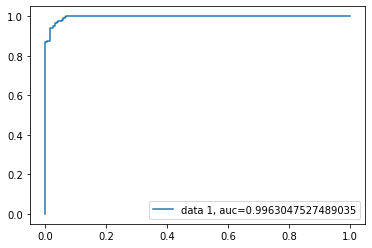

In [441]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [454]:
df_test_data = pd.read_csv("test_with_data.csv")

X_prediction = df_test_data.loc[:,["campaign_type","quantity_mode","quantity_mean","selling_price_mean","other_discount_mean","coupn_discount_mean","brand_type_mode","category_mode"]]


In [455]:
X_prediction.keys()

Index(['campaign_type', 'quantity_mode', 'quantity_mean', 'selling_price_mean',
       'other_discount_mean', 'coupn_discount_mean', 'brand_type_mode',
       'category_mode'],
      dtype='object')

In [456]:
one_hot = pd.get_dummies(X_prediction['campaign_type'])
X_prediction = X_prediction.drop('campaign_type',axis = 1)
# Join the encoded df
X_prediction = X_prediction.join(one_hot)

one_hot = pd.get_dummies(X_prediction['brand_type_mode'])
X_prediction = X_prediction.drop('brand_type_mode',axis = 1)
# Join the encoded df
X_prediction = X_prediction.join(one_hot)



cols = ["quantity_mode","quantity_mean","selling_price_mean","other_discount_mean","coupn_discount_mean","category_mode","camp_X","camp_Y","brand_Established","brand_Local","brand_Not_Available"]

X_prediction.columns = cols


one_hot = pd.get_dummies(X_prediction['category_mode'])
X_prediction = X_prediction.drop('category_mode',axis = 1)
# Join the encoded df
X_prediction = X_prediction.join(one_hot)


In [463]:
X_test.keys()

Index(['quantity_mode', 'quantity_mean', 'selling_price_mean',
       'other_discount_mean', 'coupn_discount_mean', 'camp_X', 'camp_Y',
       'brand_Established', 'brand_Local', 'brand_Not_Available',
       'Dairy, Juices & Snacks', 'Grocery', 'Natural Products',
       'Not Available', 'Packaged Meat', 'Pharmaceutical', 'Prepared Food',
       'Seafood'],
      dtype='object')

In [460]:
X_prediction.keys()

Index(['quantity_mode', 'quantity_mean', 'selling_price_mean',
       'other_discount_mean', 'coupn_discount_mean', 'camp_X', 'camp_Y',
       'brand_Established', 'brand_Local', 'brand_Not_Available', 'Bakery',
       'Dairy, Juices & Snacks', 'Grocery', 'Meat', 'Natural Products',
       'Not Available', 'Packaged Meat', 'Pharmaceutical', 'Prepared Food',
       'Seafood', 'Skin & Hair Care'],
      dtype='object')

In [468]:
for key in list(X_prediction.keys()):
    if key not in list(X_test):
        print(key)
        X_prediction = X_prediction.drop(key , axis=1)

Bakery
Meat
Skin & Hair Care


In [469]:
X_prediction

,quantity_mode,quantity_mean,selling_price_mean,other_discount_mean,coupn_discount_mean,camp_X,camp_Y,brand_Established,brand_Local,brand_Not_Available,"Dairy, Juices & Snacks",Grocery,Natural Products,Not Available,Packaged Meat,Pharmaceutical,Prepared Food,Seafood
0,1,1.000000,132.860667,-33.483333,-4.749333,1,0,1,0,0,0,1,0,0,0,0,0,0
1,1,1.181818,106.505455,-7.707273,0.000000,0,1,1,0,0,0,0,0,0,0,1,0,0
2,0,0.000000,0.000000,0.000000,0.000000,1,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0.000000,0.000000,0.000000,0.000000,0,1,0,0,1,0,0,0,1,0,0,0,0
4,0,0.000000,0.000000,0.000000,0.000000,0,1,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50221,0,0.000000,0.000000,0.000000,0.000000,0,1,0,0,1,0,0,0,1,0,0,0,0
50222,1,1.000000,89.046667,-74.443333,0.000000,0,1,1,0,0,0,1,0,0,0,0,0,0
50223,1,1.000000,110.155000,-9.796250,0.000000,0,1,1,0,0,0,1,0,0,0,0,0,0
50224,1,1.500000,89.050000,-60.020000,-35.620000,1,0,1,0,0,0,1,0,0,0,0,0,0


In [470]:
y_pred=logreg.predict(X_prediction)

In [471]:
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [472]:
X_prediction["prediction"] = list(y_pred)

In [473]:
X_prediction.to_csv("Output.csv", index= False)